In [2]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
%config InlineBackend.figure_format = 'retina'
from sklearn import set_config
#for displaying as diagram
set_config(display='diagram')

In [4]:
crowns_data=pd.read_csv("lab_Data.csv")

In [4]:
crowns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4775 entries, 0 to 4774
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4775 non-null   int64  
 1   Species             403 non-null    object 
 2   Class               403 non-null    object 
 3   area                4775 non-null   float64
 4   perimeter           4775 non-null   float64
 5   edge_to_area_ratio  4775 non-null   float64
 6   mean.Blue           4433 non-null   float64
 7   mean.Green          4433 non-null   float64
 8   mean.Red            4433 non-null   float64
 9   mean.RedEdge        4433 non-null   float64
 10  mean.NIR            4433 non-null   float64
 11  stdev.Blue          4433 non-null   float64
 12  stdev.Green         4433 non-null   float64
 13  stdev.Red           4433 non-null   float64
 14  stdev.RedEdge       4433 non-null   float64
 15  stdev.NIR           4433 non-null   float64
 16  ndvi  

In [5]:
#counting missing/nan value

In [6]:
count_nan_in_crowns_data = crowns_data.isnull().sum()
print (count_nan_in_crowns_data)

ID                       0
Species               4372
Class                 4372
area                     0
perimeter                0
edge_to_area_ratio       0
mean.Blue              342
mean.Green             342
mean.Red               342
mean.RedEdge           342
mean.NIR               342
stdev.Blue             342
stdev.Green            342
stdev.Red              342
stdev.RedEdge          342
stdev.NIR              342
ndvi                  1485
msavi                  342
evi                    342
stdev_ndvi            1500
stdev_msavi            364
stdev_evi              379
mean.red                 0
mean.green               0
mean.blue                0
chm_mean                 0
chm_stdev                0
chm_min                  0
chm_max                  0
dtype: int64


In [7]:
#dropping all nan values

In [5]:
new_corrals=crowns_data.dropna()


In [9]:
new_corrals.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 639 to 3655
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  377 non-null    int64  
 1   Species             377 non-null    object 
 2   Class               377 non-null    object 
 3   area                377 non-null    float64
 4   perimeter           377 non-null    float64
 5   edge_to_area_ratio  377 non-null    float64
 6   mean.Blue           377 non-null    float64
 7   mean.Green          377 non-null    float64
 8   mean.Red            377 non-null    float64
 9   mean.RedEdge        377 non-null    float64
 10  mean.NIR            377 non-null    float64
 11  stdev.Blue          377 non-null    float64
 12  stdev.Green         377 non-null    float64
 13  stdev.Red           377 non-null    float64
 14  stdev.RedEdge       377 non-null    float64
 15  stdev.NIR           377 non-null    float64
 16  ndvi 

In [10]:
#making as percentage
new_corrals.Class.value_counts()

Shrub    364
Grass     13
Name: Class, dtype: int64

In [11]:
new_corrals.Species.value_counts()

ERNA    166
PUTR    149
ARTR     49
PSSP      6
LECI      5
ELEL      2
Name: Species, dtype: int64

In [6]:
#making as percentage
new_corrals.Class.value_counts(normalize=True)
new_corrals.Species.value_counts(normalize=True)


ERNA    0.440318
PUTR    0.395225
ARTR    0.129973
PSSP    0.015915
LECI    0.013263
ELEL    0.005305
Name: Species, dtype: float64

In [7]:
new_corrals.drop(columns=['ID'], inplace=True)
#new_corrals.head()

/var/folders/t3/8m7rjl8j22z_t862rt5lvyrr0000gr/T/ipykernel_98590/3718422776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_corrals.drop(columns=['ID'], inplace=True)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
#from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree

In [9]:
# creating a copy of the original data frame
df = new_corrals.copy()
  
# calling the get_dummies method
# the first parameter mentions the
# the name of the data frame to store the
# new data frame in
# the second parameter is the list of
# columns which if not mentioned
# returns the dummies for all
# categorical columns
df2 = pd.get_dummies(df,
                     columns = ['Class'])
  
#display(df2)

In [10]:
#We want grass =0 and shrub =1 So we drop grass column here
new_corrals2 = df2.drop(["Class_Grass"], axis=1)
 
# Rename the Column
result =new_corrals2.rename(columns={"Class_Shrub": "Class"})
 

In [11]:
result.head()

,Species,area,perimeter,edge_to_area_ratio,mean.Blue,mean.Green,mean.Red,mean.RedEdge,mean.NIR,stdev.Blue,...,stdev_msavi,stdev_evi,mean.red,mean.green,mean.blue,chm_mean,chm_stdev,chm_min,chm_max,Class
639,ERNA,0.562880,4.825744,8.573308,618.869934,816.166992,774.757263,1151.674072,1175.343994,120.017982,...,0.001242,0.001812,150.871552,145.270721,112.213753,0.334368,0.116499,0.123047,0.600708,1
645,ERNA,0.191042,2.777407,14.538220,703.030701,975.692749,926.130188,1729.579590,1416.177124,153.973877,...,0.004052,0.004280,159.993530,153.192703,116.439598,0.191805,0.030107,0.131348,0.268799,1
652,ERNA,0.458319,3.506476,7.650726,704.761841,905.086609,849.875732,1383.547974,1202.017212,142.318634,...,0.001241,0.002181,156.102036,151.324478,119.262779,0.342220,0.111424,0.143066,0.570068,1
659,ERNA,0.524009,3.610629,6.890397,675.297058,889.512573,830.000916,1417.214722,1245.213745,162.881104,...,0.001196,0.002211,157.816513,153.569901,120.358109,0.350989,0.110289,0.117798,0.533936,1
670,PUTR,0.864509,4.304980,4.979682,491.368652,980.719543,893.019836,2080.803467,2109.871582,132.878311,...,0.000837,0.000807,160.837112,150.000046,90.671852,0.573602,0.237925,0.144531,1.047241,1


## Species classification with class feature

In [12]:
#X-is train ,y-is target(want to predict)

X,y = result.drop(columns=['Species']), result.Species

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0,stratify=y)

In [14]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    #precision[key] = precision_score(predictions, y_test)
    #recall[key] = recall_score(predictions, y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [22]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy_with_Class'])

df_model['Accuracy_with_Class'] = accuracy.values()
df_model

,Accuracy_with_Class
Logistic Regression,0.768421
Support Vector Machines,0.705263
Decision Trees,0.800000
Random Forest,0.800000
Naive Bayes,0.631579
K-Nearest Neighbor,0.736842


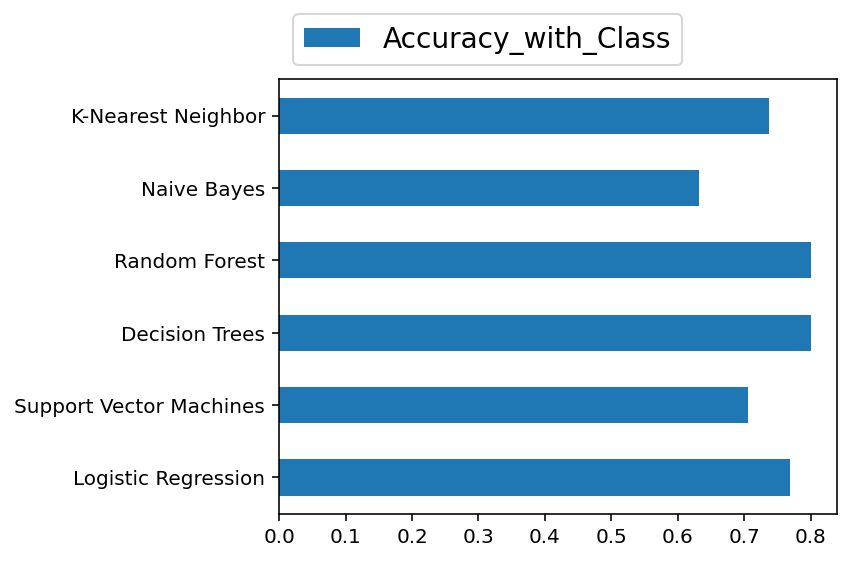

In [23]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

# without Class

In [24]:
result.head()

,Species,area,perimeter,edge_to_area_ratio,mean.Blue,mean.Green,mean.Red,mean.RedEdge,mean.NIR,stdev.Blue,...,stdev_msavi,stdev_evi,mean.red,mean.green,mean.blue,chm_mean,chm_stdev,chm_min,chm_max,Class
639,ERNA,0.562880,4.825744,8.573308,618.869934,816.166992,774.757263,1151.674072,1175.343994,120.017982,...,0.001242,0.001812,150.871552,145.270721,112.213753,0.334368,0.116499,0.123047,0.600708,1
645,ERNA,0.191042,2.777407,14.538220,703.030701,975.692749,926.130188,1729.579590,1416.177124,153.973877,...,0.004052,0.004280,159.993530,153.192703,116.439598,0.191805,0.030107,0.131348,0.268799,1
652,ERNA,0.458319,3.506476,7.650726,704.761841,905.086609,849.875732,1383.547974,1202.017212,142.318634,...,0.001241,0.002181,156.102036,151.324478,119.262779,0.342220,0.111424,0.143066,0.570068,1
659,ERNA,0.524009,3.610629,6.890397,675.297058,889.512573,830.000916,1417.214722,1245.213745,162.881104,...,0.001196,0.002211,157.816513,153.569901,120.358109,0.350989,0.110289,0.117798,0.533936,1
670,PUTR,0.864509,4.304980,4.979682,491.368652,980.719543,893.019836,2080.803467,2109.871582,132.878311,...,0.000837,0.000807,160.837112,150.000046,90.671852,0.573602,0.237925,0.144531,1.047241,1


In [16]:
result2=result.drop(["Class"], axis=1)

In [26]:
result2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 639 to 3655
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Species             377 non-null    object 
 1   area                377 non-null    float64
 2   perimeter           377 non-null    float64
 3   edge_to_area_ratio  377 non-null    float64
 4   mean.Blue           377 non-null    float64
 5   mean.Green          377 non-null    float64
 6   mean.Red            377 non-null    float64
 7   mean.RedEdge        377 non-null    float64
 8   mean.NIR            377 non-null    float64
 9   stdev.Blue          377 non-null    float64
 10  stdev.Green         377 non-null    float64
 11  stdev.Red           377 non-null    float64
 12  stdev.RedEdge       377 non-null    float64
 13  stdev.NIR           377 non-null    float64
 14  ndvi                377 non-null    float64
 15  msavi               377 non-null    float64
 16  evi  

In [17]:
import seaborn as sns
sns.set()

In [18]:
#X-is train ,y-is target(want to predict)

X1,y1 = result2.drop(columns=['Species']), result2.Species

In [19]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1 , test_size=0.4, random_state=0,stratify=y1)

In [20]:
models1 = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models1['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models1['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models1['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models1['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models1['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models1['K-Nearest Neighbor'] = KNeighborsClassifier()

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy1, precision1, recall1 = {}, {}, {}

for key in models1.keys():
    
    # Fit the classifier
    models1[key].fit(X1_train, y1_train)
    
    # Make predictions
    predictions1 = models1[key].predict(X1_test)
    
    # Calculate metrics
    accuracy1[key] = accuracy_score(predictions1, y1_test)
    precision1[key] = precision_score(predictions1, y1_test, average='weighted')
    #recall[key] = recall_score(predictions, y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [22]:
accuracy1

{'Logistic Regression': 0.7549668874172185,
 'Support Vector Machines': 0.7947019867549668,
 'Decision Trees': 0.7483443708609272,
 'Random Forest': 0.7748344370860927,
 'Naive Bayes': 0.7086092715231788,
 'K-Nearest Neighbor': 0.7284768211920529}

In [34]:
import pandas as pd

df_model2 = pd.DataFrame(index=models1.keys(), columns=['Accuracy_w/o_Class'])

df_model2['Accuracy_w/o_Class'] = accuracy1.values()
#df_model2['Precision_w/o_Class']= precision1.values()
df_model2

,Accuracy_w/o_Class
Logistic Regression,0.754967
Support Vector Machines,0.582781
Decision Trees,0.735099
Random Forest,0.794702
Naive Bayes,0.708609
K-Nearest Neighbor,0.728477


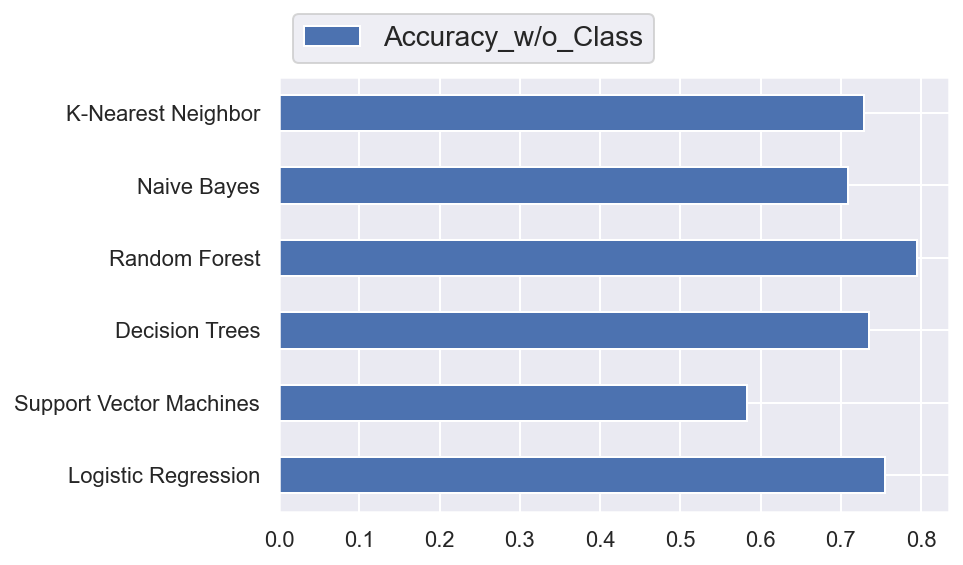

<Figure size 1368x1008 with 0 Axes>

In [36]:
#compare_df2
%config InlineBackend.figure_format = 'retina'
ax8 = df_model2.plot.barh()
ax8.legend(
    ncol=len(models1.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.figure(figsize=(19,14))
plt.tight_layout()

In [37]:
compare_df2=pd.concat([df_model2,df_model],axis=1,join='inner')

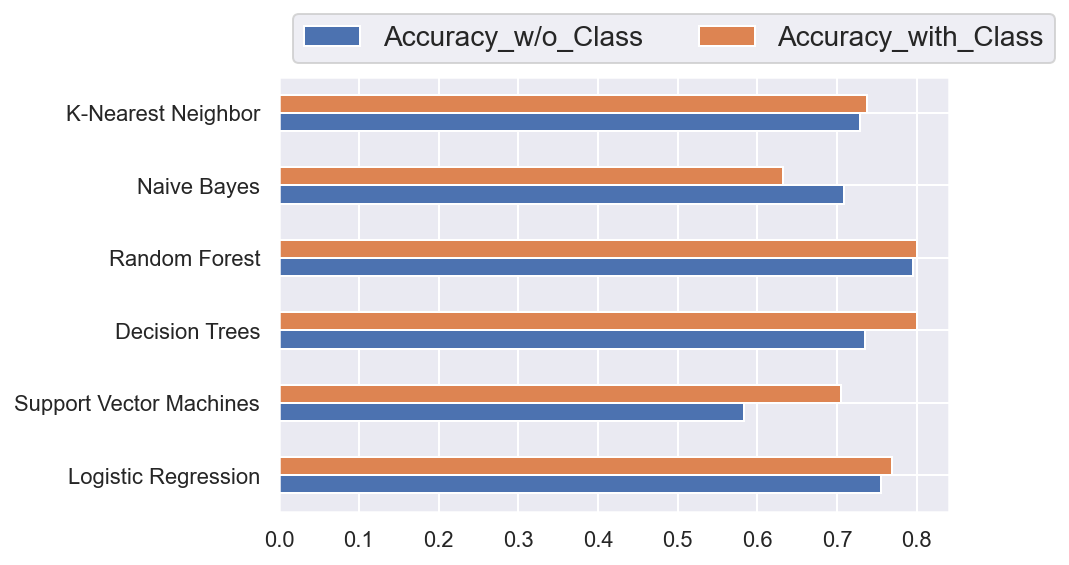

<Figure size 1368x1008 with 0 Axes>

In [38]:
ax2 = compare_df2.plot.barh()
ax2.legend(
    ncol=len(models1.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.figure(figsize=(19,14))
plt.tight_layout()

In [39]:
 #predictions1 = models1[key].predict(X1_test)
cm2 = confusion_matrix(y1_test,predictions1, labels= models1['Random Forest'].classes_)

#ploting with labels
    
plt.figure(figsize=(34,19))    
# plt.figure(figsize=(10,7))
sns.set(font_scale=1) # for label size    
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=models1['Random Forest'].classes_)
#disp.plot()
#print(disp)
# Visualize it as a heatmap
import seaborn
#seaborn.heatmap(disp)
#plt.show()

<Figure size 2448x1368 with 0 Axes>

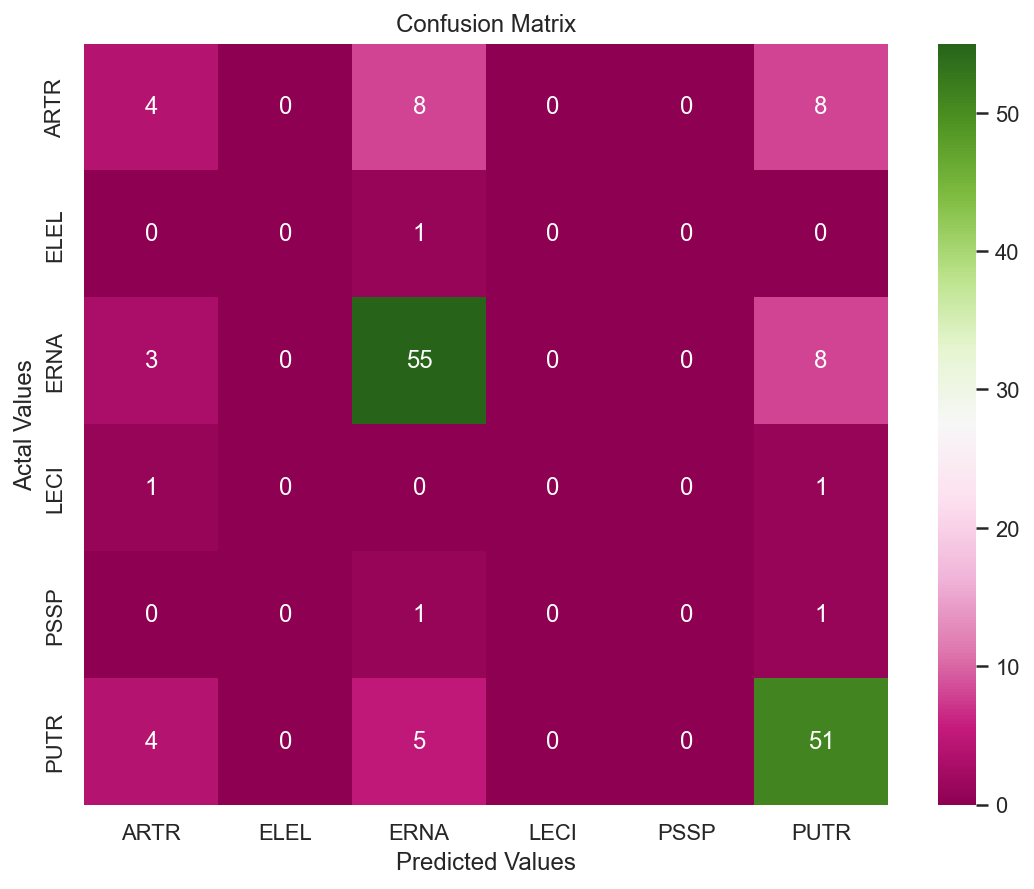

In [40]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm2,index =[models1['Random Forest'].classes_] , columns = [models1['Random Forest'].classes_])

#Plotting the confusion matrix for Species classification for Random forest classifier
plt.figure(figsize=(9,7))
sns.heatmap(cm_df, annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


## Scores from the above list of algorithms Logistic Regression and Random Forest are doing comparatively better than other models

In [23]:
from matplotlib import pyplot as plt
from sklearn import metrics

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1, y1, test_size=0.4, random_state=1)

In [25]:
modelR = RandomForestClassifier()
modelR=modelR.fit(X_train, Y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(Y_train,
                             modelR.predict(X_train))*100)
print('test Accuracy : ',
      metrics.accuracy_score(Y_test,
                             modelR.predict(X_test))*100)

Training Accuracy :  100.0
test Accuracy :  77.48344370860927


<Figure size 720x504 with 0 Axes>

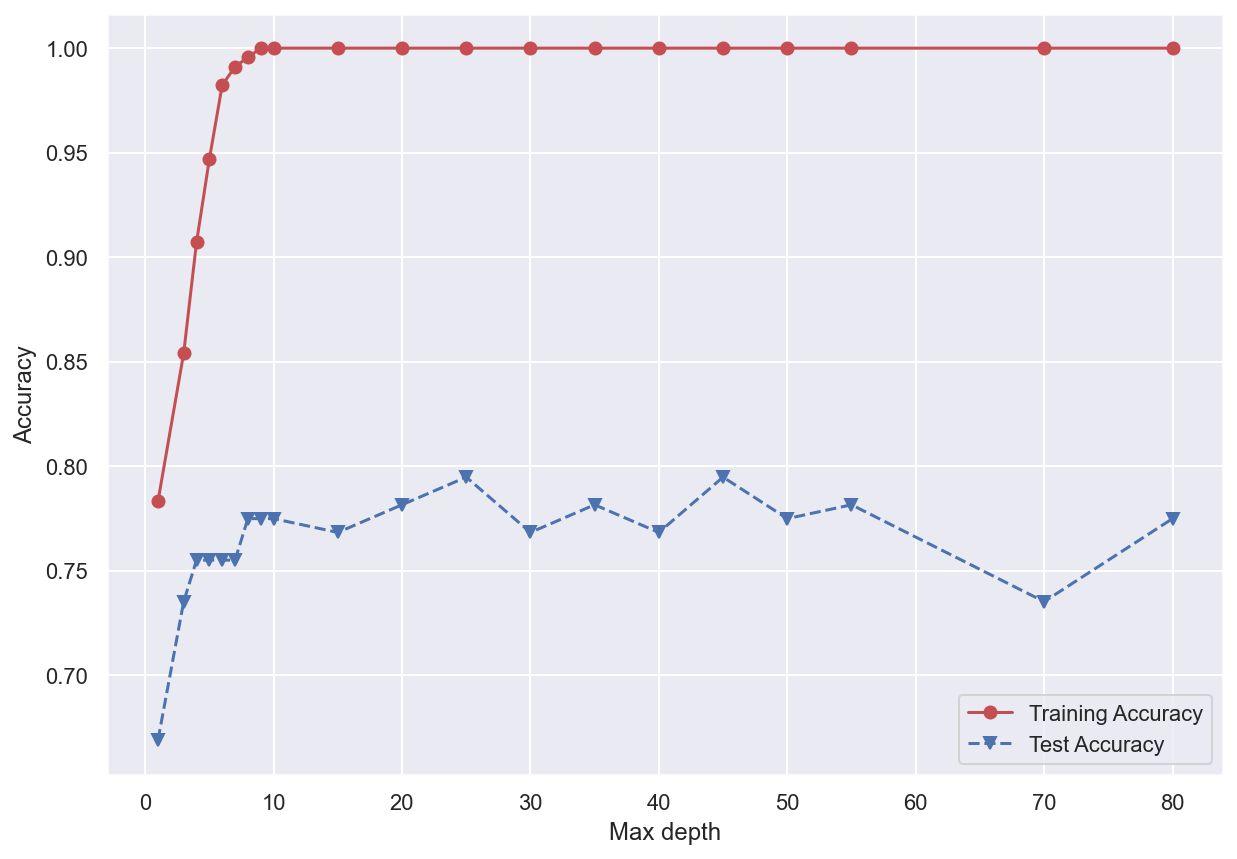

<Figure size 720x504 with 0 Axes>

In [44]:

import random

random.seed(10)

#########################################
# Training and Test set creation
#########################################

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1, y1, test_size=0.4, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [1,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,70,80]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clfR = RandomForestClassifier(max_depth=depth)
    clfR = clfR.fit(X_train, Y_train)
    Y_predTrain = clfR.predict(X_train)
    Y_predTest = clfR.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
plt.figure(figsize=(10,7) )   
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.figure(figsize=(10,7) )

## Fitting 5 folds

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, y1, test_size=0.4, random_state=1,stratify=y1)

In [27]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

In [28]:
from sklearn.model_selection import ParameterGrid

In [29]:
param_grid = {
    'max_depth': [2,3,4],
    'criterion' :['gini','entropy'],
    'n_estimators': [5,10,20,30, 40,50,60,70,80,100,150,200]
    #'max_features':['sqrt', 'log2', None]
}

all_params=ParameterGrid(param_grid)
all_params=list(all_params)

In [51]:
# f_res=[]
# f_tr=[]
# for param in all_params[-10:]:
#     kf = KFold(n_splits=5,random_state=10,shuffle=True)
#     res=[]
#     tr=[]
#     for train_id, validation_id in kf.split(X_train, Y_train):
#         X_tr=X_train.values[train_id]
#         X_val=X_train.values[validation_id]
#         y_tr=y_train.values[train_id]
#         y_val=y_train.values[validation_id]
        
#         model = RandomForestClassifier(criterion=param['criterion'],
#                                        n_estimators=param['n_estimators'], max_depth=param['max_depth'], 
#                                        random_state = 1099)
#         model.fit(X_tr, y_tr)
#         y_hat=model.predict(X_val)
#         tr.extend(y_val.tolist())
#         res.extend(y_hat.tolist())
#     f_res.append(res)
#     f_tr.append(tr)

In [ ]:
# pred=pd.DataFrame(f_res).T.mode(axis=1).iloc[:, 0]
# true_vals=pd.DataFrame(f_tr).T.iloc[:, 0]
# accuracy_score(pred, true_vals)

In [146]:
# CV_f1 = np.zeros(len(all_params))
# CV_accuracy = np.zeros(len(all_params))
# CV_recall = np.zeros(len(all_params))
# CV_precision = np.zeros(len(all_params))
# k = 5
# for param in all_params:
#     recall, accuracy, precision, f1 = 0, 0, 0, 0
#     kf = KFold(n_splits=k,random_state=10,shuffle=True)
#     for train_id, validation_id in kf.split(X_train, Y_train):
#         X_tr=X_train[train_id]
#         X_val=X_train[validation_id]
#         y_tr=Y_train[train_id]
#         y_val=Y_train[validation_id]
#         model = RandomForestClassifier(criterion=param['criterion'],
#                                        n_estimators=param['n_estimators'], max_depth=param['max_depth'], 
#                                        random_state = 1099)
#         model.fit(X_tr, y_tr, max_iters=5000, lr=0.01, C = Grid_C[C])
#         y_hat = model.predict(X_val)
#         f1 += metrics.f1_score(y_true = y_val, y_pred = y_hat)
#         recall += metrics.recall_score(y_true = y_val, y_pred = y_hat)
#         precision += metrics.precision_score(y_true = y_val, y_pred = y_hat)
#         accuracy += metrics.accuracy_score(y_true = y_val, y_pred = y_hat)
#     avg_f1 = f1/k; avg_acc = accuracy/k; avg_pre = precision/k; avg_rec = recall/k
#     CV_f1[C] = avg_f1; CV_accuracy[C] = avg_acc; CV_recall[C] = avg_rec; CV_precision[C] = avg_pre 

# K-Fold Cross Validation Technique

In [30]:
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [31]:
j=ParameterGrid(param_grid)

In [32]:
3*2*12

72

In [33]:
import random

random.seed(10)
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,3,4],
    'criterion' :['gini','entropy'],
    'n_estimators': [5,10,20,30, 40,50,60,70,80,100,150,200]
    #'max_features':['sqrt', 'log2', None]
}
# Create a base model
rfCV = RandomForestClassifier(random_state = 1099)

# Instantiate the grid search model
RF_CV = GridSearchCV(estimator = rfCV, cv=5,param_grid = param_grid, n_jobs = -1, verbose = 2, return_train_score=True)
# Fit the grid search to the data
RF_CV.fit(X_train, Y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1099),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [5, 10, 20, 30, 40, 50, 60, 70, 80,
                                          100, 150, 200]},
             return_train_score=True, verbose=2)

In [59]:
p2=RF_CV.predict(X_train)
print('train_Accuracy:' ,accuracy_score(p2, Y_train))

train_Accuracy: 0.9026548672566371


In [ ]:
[j for j in RF_CV.cv_results_.keys()]

In [60]:
p3=RF_CV.predict(X_test)
accuracy_score(p3,Y_test)
print('test_Accuracy:' ,accuracy_score(p3, Y_test))

test_Accuracy: 0.8211920529801324


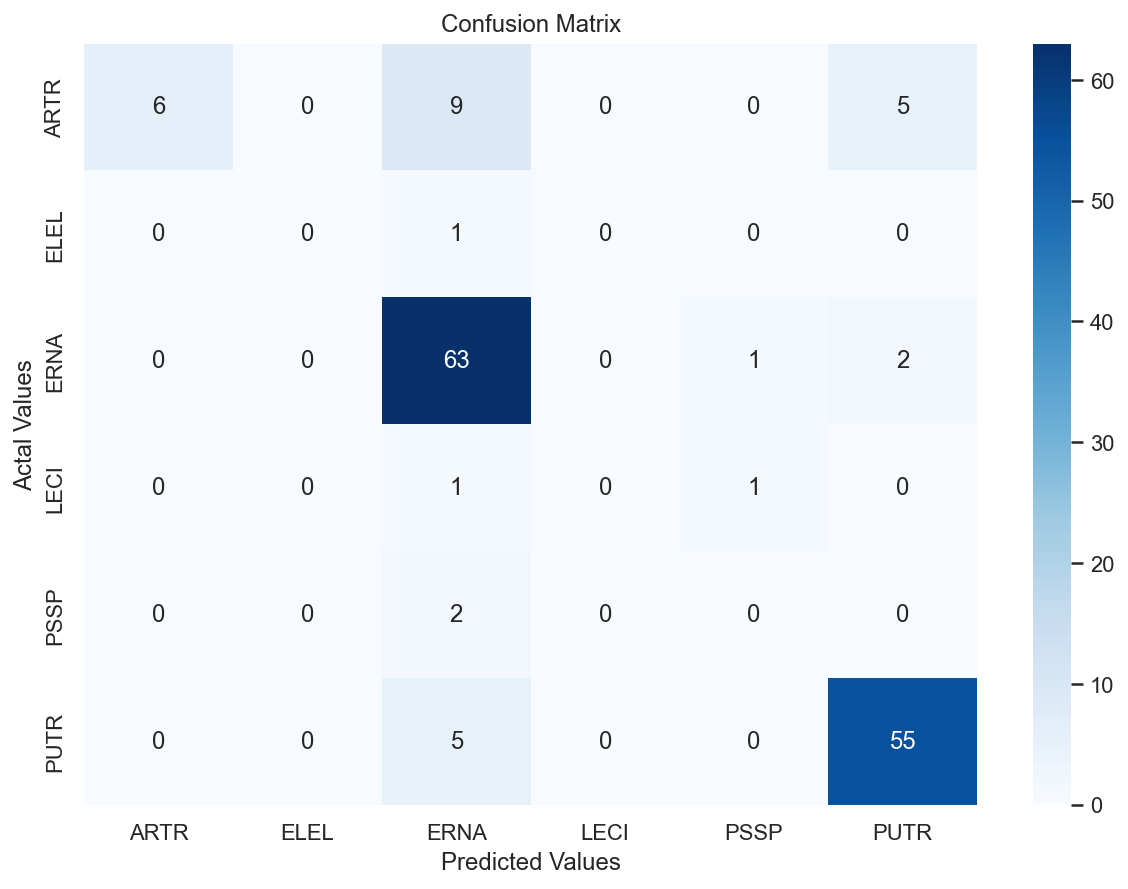

In [61]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.


cm3 = confusion_matrix(Y_test,p3,labels=models1['Random Forest'].classes_)
cm_df1 = pd.DataFrame(cm3,index =[models1['Random Forest'].classes_] , columns = [models1['Random Forest'].classes_])




#ploting with labels
    
plt.figure(figsize=(10,7))    

sns.set(font_scale=1) # for label size    

import seaborn
seaborn.heatmap(cm_df1,annot=True,cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [62]:
kflod_grid_df=pd.DataFrame([[0.9026,0.8212]],columns=['train_Accuracy','test_Accuracy'])
kflod_grid_df

,train_Accuracy,test_Accuracy
0,0.9026,0.8212


In [63]:
  # Initialize data of lists
dat = [{'Train_acc ': 1, 'Test_acc':.7881 }, {'Train_acc ':.9026, 'Test_acc':.8212 }]  
# Creates pandas DataFrame by passing
# Lists of dictionaries and row index.
kfold_df = pd.DataFrame(dat, index=['before_kfold', 'after_kfold'])
kfold_df

,Train_acc,Test_acc
before_kfold,1.0000,0.7881
after_kfold,0.9026,0.8212


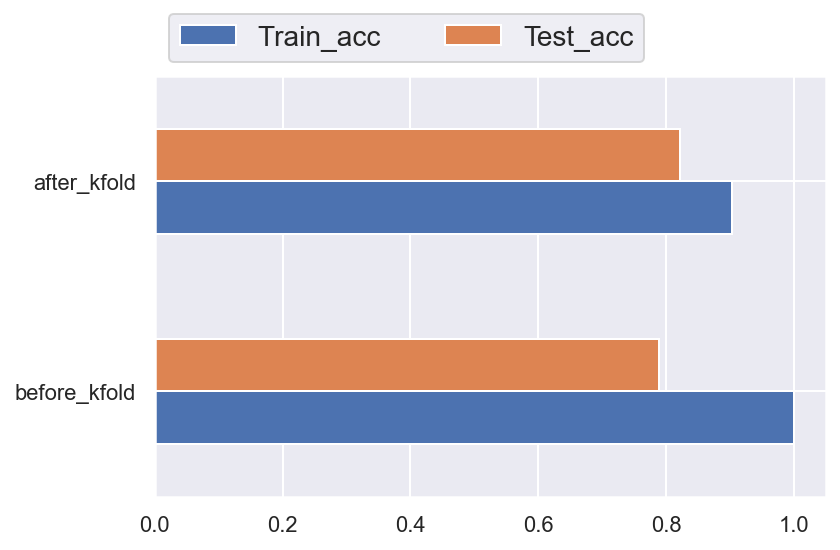

In [64]:
ax4 = kfold_df.plot.barh()
ax4.legend(
    ncol=len(kfold_df), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

The graph shows overfitting is reduced


# Ensemble Methods

In [65]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [34]:
import random

random.seed(10)

In [35]:
result2.head()
#result2.info()

,Species,area,perimeter,edge_to_area_ratio,mean.Blue,mean.Green,mean.Red,mean.RedEdge,mean.NIR,stdev.Blue,...,stdev_ndvi,stdev_msavi,stdev_evi,mean.red,mean.green,mean.blue,chm_mean,chm_stdev,chm_min,chm_max
639,ERNA,0.562880,4.825744,8.573308,618.869934,816.166992,774.757263,1151.674072,1175.343994,120.017982,...,0.000391,0.001242,0.001812,150.871552,145.270721,112.213753,0.334368,0.116499,0.123047,0.600708
645,ERNA,0.191042,2.777407,14.538220,703.030701,975.692749,926.130188,1729.579590,1416.177124,153.973877,...,0.001131,0.004052,0.004280,159.993530,153.192703,116.439598,0.191805,0.030107,0.131348,0.268799
652,ERNA,0.458319,3.506476,7.650726,704.761841,905.086609,849.875732,1383.547974,1202.017212,142.318634,...,0.000353,0.001241,0.002181,156.102036,151.324478,119.262779,0.342220,0.111424,0.143066,0.570068
659,ERNA,0.524009,3.610629,6.890397,675.297058,889.512573,830.000916,1417.214722,1245.213745,162.881104,...,0.000409,0.001196,0.002211,157.816513,153.569901,120.358109,0.350989,0.110289,0.117798,0.533936
670,PUTR,0.864509,4.304980,4.979682,491.368652,980.719543,893.019836,2080.803467,2109.871582,132.878311,...,0.000378,0.000837,0.000807,160.837112,150.000046,90.671852,0.573602,0.237925,0.144531,1.047241


In [36]:
result3=result2.copy()
result3["Species"] = result3["Species"] .astype('category')


In [37]:
result3["Species"] = result3["Species"] .cat.codes
#result3["Species"] = result3["Species"] .astype('category')
#result3.dtypes

In [38]:
X2,y2 = result3.drop(columns=['Species']), result3.Species


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X2)


In [71]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

In [72]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_scaled, y2, test_size = 0.4, random_state = 1, stratify = y2)

In [73]:
rfc = RandomForestClassifier(n_estimators=200, random_state=1)
abc = AdaBoostClassifier(n_estimators=200, random_state= 1, learning_rate=0.01)
gbc = GradientBoostingClassifier(n_estimators=200, random_state=1, learning_rate=0.01)
xgb_clf = xgb.XGBClassifier(n_estimators=200, learning_rate=0.01, random_state=1)

In [74]:
rfc.fit(X2_train, y2_train)
abc.fit(X2_train, y2_train)
gbc.fit(X2_train, y2_train)
xgb_clf.fit(X2_train, y2_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=1, reg_alpha=0, ...)

In [75]:
print('Random Forest: ', rfc.score(X2_test, y2_test))
print('AdaBoost: ', abc.score(X2_test, y2_test))
print('Gradient Boost: ', gbc.score(X2_test, y2_test))
print('XGBoost: ', xgb_clf.score(X2_test, y2_test))

Random Forest:  0.8410596026490066
AdaBoost:  0.4370860927152318
Gradient Boost:  0.7682119205298014
XGBoost:  0.8145695364238411


In [76]:
from sklearn import model_selection

import pickle

# save the model to disk
# # Export model
# pickle.dump(model, open('model.pkl', 'wb'))
# # Read the Modelfilename = 'rfc_model.sav'
#pickle.dump(rfc, open(filename, 'wb'))

In [77]:

# save the model to disk
#filename = 'rfc_model.pkl'
pickle.dump(rfc, open('rfc.pkl', 'wb'))

In [78]:
# Initialize data of lists
dat1 = [{'Random Forest':  0.84105, 'AdaBoost':  0.43708, 'Gradient Boost':  0.76821 , 'XGBoost':  0.81456}]
  
# Creates pandas DataFrame by passing
# Lists of dictionaries and row index.
en_df = pd.DataFrame(dat1, index=['ensemble_methods'])
en_df

,Random Forest,AdaBoost,Gradient Boost,XGBoost
ensemble_methods,0.84105,0.43708,0.76821,0.81456


<Figure size 1080x1080 with 0 Axes>

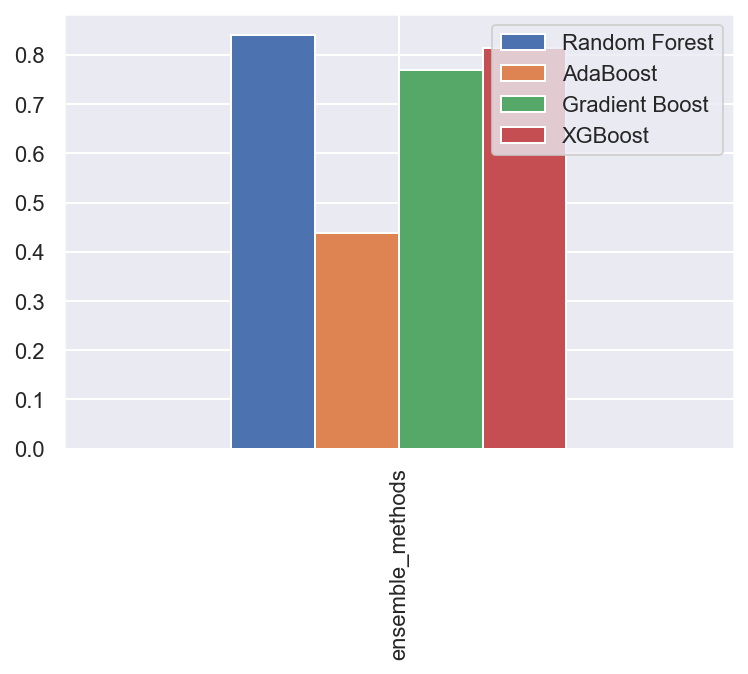

In [81]:
plt.figure(figsize=(15,15) )
en_df.plot(kind='bar')
plt.show()

In [ ]:
#so far over-fitting reduced further more and random forsest model's performence is better than all other models

Feature: 0, Score: 0.00504
Feature: 1, Score: 0.02549
Feature: 2, Score: 0.01048
Feature: 3, Score: 0.02800
Feature: 4, Score: 0.00802
Feature: 5, Score: 0.02259
Feature: 6, Score: 0.01096
Feature: 7, Score: 0.01804
Feature: 8, Score: 0.03417
Feature: 9, Score: 0.00980
Feature: 10, Score: 0.00870
Feature: 11, Score: 0.00911
Feature: 12, Score: 0.01031
Feature: 13, Score: 0.00766
Feature: 14, Score: 0.00247
Feature: 15, Score: 0.02882
Feature: 16, Score: 0.00949
Feature: 17, Score: 0.00360
Feature: 18, Score: 0.21513
Feature: 19, Score: 0.01461
Feature: 20, Score: 0.03147
Feature: 21, Score: 0.19588
Feature: 22, Score: 0.12377
Feature: 23, Score: 0.10569
Feature: 24, Score: 0.01517
Feature: 25, Score: 0.04552


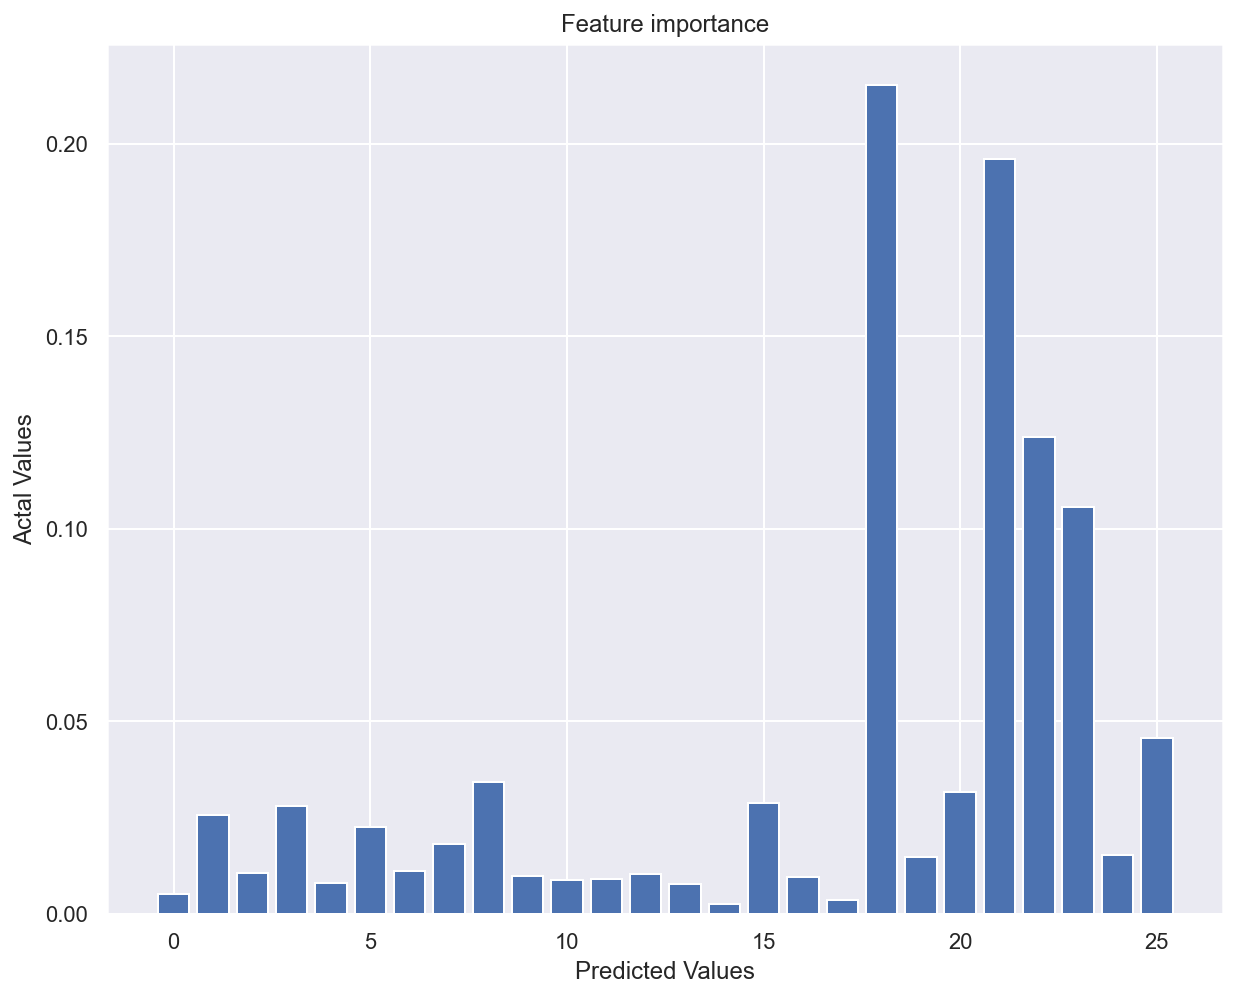

In [86]:

# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset

model7 = RandomForestRegressor()
# fit the model
model7.fit(X2, y2)
# get importance
importance = model7.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.figure(figsize=(10,8))
pyplot.bar([x for x in range(len(importance))], importance)
plt.title('Feature importance')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
pyplot.show()

In [ ]:
#Fill in missing values of the whole dataset 

# Steps to Predicting the Missing Data:

In [96]:
pip install feature-engine

Note: you may need to restart the kernel to use updated packages.


## Imputation with the median

Many real-world datasets have missing values, which are frequently encoded as blanks, NaNs, or other placeholders. Nevertheless, scikit-learn estimators cannot be used with these datasets because they presuppose that all values in an array are numerical and have significance. Discarding entire rows and/or columns with missing values is a fundamental technique for working with incomplete datasets. Unfortunately, doing so results in the loss of potentially useful data (even though incomplete). Impute the missing numbers, or infer them from the known portion of the data, is a preferable approach.

In [97]:

from feature_engine.imputation import MeanMedianImputer


In [142]:
#result3.info()

In [99]:
# Load dataset
data2 = pd.read_csv("crowns_df.csv")
df2=data2.drop(['ID','Species','Class'], axis=1)
# df2.head()

In [100]:
count_nan_in_df2 = df2.isnull().sum()
print (count_nan_in_df2)

area                     0
perimeter                0
edge_to_area_ratio       0
mean.Blue              342
mean.Green             342
mean.Red               342
mean.RedEdge           342
mean.NIR               342
stdev.Blue             342
stdev.Green            342
stdev.Red              342
stdev.RedEdge          342
stdev.NIR              342
ndvi                  1485
msavi                  342
evi                    342
stdev_ndvi            1500
stdev_msavi            364
stdev_evi              379
mean.red                 0
mean.green               0
mean.blue                0
chm_mean                 0
chm_stdev                0
chm_min                  0
chm_max                  0
dtype: int64


In [101]:
data2['evi'].isnull().sum()

342

In [102]:
# Separate into train and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(
    df2.drop(['area'], axis=1),
    df2['area'],
    test_size=0.4,
    random_state=0
)
X3_train.shape, X3_test.shape


((2865, 25), (1910, 25))

In [103]:
from feature_engine.imputation import EndTailImputer

In [104]:
# set up the imputer
imputer_median = MeanMedianImputer(
    imputation_method='median', variables=['mean.Blue',
 'mean.Green',
 'mean.Red',
 'mean.RedEdge',
 'mean.NIR',
 'stdev.Blue',
 'stdev.Green',
 'stdev.Red',
 'stdev.RedEdge',
 'stdev.NIR',
 'ndvi',
 'msavi',
 'evi',
 'stdev_ndvi',
 'stdev_msavi',
 'stdev_evi'])

In [105]:
# Find median values

imputer_median.fit(X3_train)

MeanMedianImputer(variables=['mean.Blue', 'mean.Green', 'mean.Red',
                             'mean.RedEdge', 'mean.NIR', 'stdev.Blue',
                             'stdev.Green', 'stdev.Red', 'stdev.RedEdge',
                             'stdev.NIR', 'ndvi', 'msavi', 'evi', 'stdev_ndvi',
                             'stdev_msavi', 'stdev_evi'])

In [106]:
# set up the imputer
imputer_gaussian = EndTailImputer(
    imputation_method='gaussian', variables=['mean.Blue',
 'mean.Green',
 'mean.Red',
 'mean.RedEdge',
 'mean.NIR',
 'stdev.Blue',
 'stdev.Green',
 'stdev.Red',
 'stdev.RedEdge',
 'stdev.NIR',
 'ndvi',
 'msavi',
 'evi',
 'stdev_ndvi',
 'stdev_msavi',
 'stdev_evi'])
                                        

In [107]:
# Let's corroborate that the dictionary 
# contains the median values of the variables.

X3_train[['mean.Blue',
 'mean.Green',
 'mean.Red',
 'mean.RedEdge',
 'mean.NIR',
 'stdev.Blue',
 'stdev.Green',
 'stdev.Red',
 'stdev.RedEdge',
 'stdev.NIR',
 'ndvi',
 'msavi',
 'evi',
 'stdev_ndvi',
 'stdev_msavi',
 'stdev_evi']].median()

mean.Blue         323.603012
mean.Green        548.745422
mean.Red          467.195129
mean.RedEdge     1106.279785
mean.NIR         1214.243408
stdev.Blue         58.246790
stdev.Green        83.744099
stdev.Red          75.135220
stdev.RedEdge     117.385281
stdev.NIR         124.703049
ndvi                0.002877
msavi               0.006385
evi                 0.004174
stdev_ndvi          0.001442
stdev_msavi         0.002833
stdev_evi           0.003331
dtype: float64

In [108]:
# impute the data

train_t= imputer_median.transform(X3_train)
test_t = imputer_median.transform(X3_test)
no_missing_median=pd.concat([train_t, test_t])
no_missing_median.sort_index(inplace=True)
no_missing_median.head()

,perimeter,edge_to_area_ratio,mean.Blue,mean.Green,mean.Red,mean.RedEdge,mean.NIR,stdev.Blue,stdev.Green,stdev.Red,...,stdev_ndvi,stdev_msavi,stdev_evi,mean.red,mean.green,mean.blue,chm_mean,chm_stdev,chm_min,chm_max
0,4.409133,15.257930,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,75.13522,...,0.001442,0.002833,0.003331,166.998215,160.704224,123.871429,0.195925,0.030815,0.150024,0.263916
1,3.541193,8.546887,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,75.13522,...,0.001442,0.002833,0.003331,160.587936,154.385712,117.412163,0.240878,0.055254,0.150269,0.357788
2,3.888369,8.489555,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,75.13522,...,0.001442,0.002833,0.003331,179.241623,171.927490,130.955276,0.248533,0.057536,0.149902,0.373047
3,2.916277,13.025697,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,75.13522,...,0.001442,0.002833,0.003331,181.233414,176.158005,138.069183,0.200809,0.030480,0.147827,0.277222
4,2.221925,26.334947,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,75.13522,...,0.001442,0.002833,0.003331,175.276062,172.257019,138.922546,0.181163,0.019786,0.150146,0.221436


In [109]:
yN=pd.DataFrame(df2['area'])
pred_value_median=pd.concat([yN,no_missing_median], axis="columns")
pred_value_median

,area,perimeter,edge_to_area_ratio,mean.Blue,mean.Green,mean.Red,mean.RedEdge,mean.NIR,stdev.Blue,stdev.Green,...,stdev_ndvi,stdev_msavi,stdev_evi,mean.red,mean.green,mean.blue,chm_mean,chm_stdev,chm_min,chm_max
0,0.288973,4.409133,15.257930,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,...,0.001442,0.002833,0.003331,166.998215,160.704224,123.871429,0.195925,0.030815,0.150024,0.263916
1,0.414326,3.541193,8.546887,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,...,0.001442,0.002833,0.003331,160.587936,154.385712,117.412163,0.240878,0.055254,0.150269,0.357788
2,0.458018,3.888369,8.489555,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,...,0.001442,0.002833,0.003331,179.241623,171.927490,130.955276,0.248533,0.057536,0.149902,0.373047
3,0.223886,2.916277,13.025697,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,...,0.001442,0.002833,0.003331,181.233414,176.158005,138.069183,0.200809,0.030480,0.147827,0.277222
4,0.084372,2.221925,26.334947,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,...,0.001442,0.002833,0.003331,175.276062,172.257019,138.922546,0.181163,0.019786,0.150146,0.221436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,1.111598,4.548003,4.091411,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,...,0.001442,0.002833,0.003331,151.661636,136.138687,95.875359,1.754028,0.982317,0.549194,3.853271
4771,1.139621,4.617439,4.051731,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,...,0.001442,0.002833,0.003331,144.890945,129.678467,91.414825,1.633561,0.891511,0.574951,3.680176
4772,2.370243,8.366938,3.529991,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,...,0.001442,0.002833,0.003331,119.492584,110.748672,75.828621,1.439602,0.716141,0.568726,3.369507
4773,2.157807,19.511282,9.042180,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,...,0.001442,0.002833,0.003331,167.375397,153.888779,106.953186,0.330553,0.122733,0.082275,0.688232


In [111]:
#save the predicted missing value as csv file


pred_value_median.to_csv('fi_pred_val_med.csv')


## with gaussian imputer

In [112]:
# Separate into train and test sets
X4_train, X4_test, y4_train, y4_test = train_test_split(
    df2.drop(['area'], axis=1),
    df2['area'],
    test_size=0.4,
    random_state=0
)
X4_train.shape, X4_test.shape

((2865, 25), (1910, 25))

In [113]:
# set up the imputer
imputer_gaus = EndTailImputer(
    imputation_method='gaussian', variables=['mean.Blue',
 'mean.Green',
 'mean.Red',
 'mean.RedEdge',
 'mean.NIR',
 'stdev.Blue',
 'stdev.Green',
 'stdev.Red',
 'stdev.RedEdge',
 'stdev.NIR',
 'ndvi',
 'msavi',
 'evi',
 'stdev_ndvi',
 'stdev_msavi',
 'stdev_evi'])


imputer_gaus.fit(X4_train)

# impute the data

train_t4 = imputer_gaus.transform(X4_train)
test_t4 = imputer_gaus.transform(X4_test)

In [114]:
no_missing_gaus=pd.concat([train_t4, test_t4])
no_missing_gaus.sort_index(inplace=True)
no_missing_gaus.head()

,perimeter,edge_to_area_ratio,mean.Blue,mean.Green,mean.Red,mean.RedEdge,mean.NIR,stdev.Blue,stdev.Green,stdev.Red,...,stdev_ndvi,stdev_msavi,stdev_evi,mean.red,mean.green,mean.blue,chm_mean,chm_stdev,chm_min,chm_max
0,4.409133,15.257930,1059.422313,1555.773099,1482.939166,2842.814114,2938.251403,229.121143,336.384739,308.544559,...,0.097375,0.227597,0.453437,166.998215,160.704224,123.871429,0.195925,0.030815,0.150024,0.263916
1,3.541193,8.546887,1059.422313,1555.773099,1482.939166,2842.814114,2938.251403,229.121143,336.384739,308.544559,...,0.097375,0.227597,0.453437,160.587936,154.385712,117.412163,0.240878,0.055254,0.150269,0.357788
2,3.888369,8.489555,1059.422313,1555.773099,1482.939166,2842.814114,2938.251403,229.121143,336.384739,308.544559,...,0.097375,0.227597,0.453437,179.241623,171.927490,130.955276,0.248533,0.057536,0.149902,0.373047
3,2.916277,13.025697,1059.422313,1555.773099,1482.939166,2842.814114,2938.251403,229.121143,336.384739,308.544559,...,0.097375,0.227597,0.453437,181.233414,176.158005,138.069183,0.200809,0.030480,0.147827,0.277222
4,2.221925,26.334947,1059.422313,1555.773099,1482.939166,2842.814114,2938.251403,229.121143,336.384739,308.544559,...,0.097375,0.227597,0.453437,175.276062,172.257019,138.922546,0.181163,0.019786,0.150146,0.221436


In [115]:
yN=pd.DataFrame(df2['area'])
pred_value_gaus=pd.concat([yN,no_missing_gaus])

In [116]:
no_missing_gaus

,perimeter,edge_to_area_ratio,mean.Blue,mean.Green,mean.Red,mean.RedEdge,mean.NIR,stdev.Blue,stdev.Green,stdev.Red,...,stdev_ndvi,stdev_msavi,stdev_evi,mean.red,mean.green,mean.blue,chm_mean,chm_stdev,chm_min,chm_max
0,4.409133,15.257930,1059.422313,1555.773099,1482.939166,2842.814114,2938.251403,229.121143,336.384739,308.544559,...,0.097375,0.227597,0.453437,166.998215,160.704224,123.871429,0.195925,0.030815,0.150024,0.263916
1,3.541193,8.546887,1059.422313,1555.773099,1482.939166,2842.814114,2938.251403,229.121143,336.384739,308.544559,...,0.097375,0.227597,0.453437,160.587936,154.385712,117.412163,0.240878,0.055254,0.150269,0.357788
2,3.888369,8.489555,1059.422313,1555.773099,1482.939166,2842.814114,2938.251403,229.121143,336.384739,308.544559,...,0.097375,0.227597,0.453437,179.241623,171.927490,130.955276,0.248533,0.057536,0.149902,0.373047
3,2.916277,13.025697,1059.422313,1555.773099,1482.939166,2842.814114,2938.251403,229.121143,336.384739,308.544559,...,0.097375,0.227597,0.453437,181.233414,176.158005,138.069183,0.200809,0.030480,0.147827,0.277222
4,2.221925,26.334947,1059.422313,1555.773099,1482.939166,2842.814114,2938.251403,229.121143,336.384739,308.544559,...,0.097375,0.227597,0.453437,175.276062,172.257019,138.922546,0.181163,0.019786,0.150146,0.221436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,4.548003,4.091411,1059.422313,1555.773099,1482.939166,2842.814114,2938.251403,229.121143,336.384739,308.544559,...,0.097375,0.227597,0.453437,151.661636,136.138687,95.875359,1.754028,0.982317,0.549194,3.853271
4771,4.617439,4.051731,1059.422313,1555.773099,1482.939166,2842.814114,2938.251403,229.121143,336.384739,308.544559,...,0.097375,0.227597,0.453437,144.890945,129.678467,91.414825,1.633561,0.891511,0.574951,3.680176
4772,8.366938,3.529991,1059.422313,1555.773099,1482.939166,2842.814114,2938.251403,229.121143,336.384739,308.544559,...,0.097375,0.227597,0.453437,119.492584,110.748672,75.828621,1.439602,0.716141,0.568726,3.369507
4773,19.511282,9.042180,1059.422313,1555.773099,1482.939166,2842.814114,2938.251403,229.121143,336.384739,308.544559,...,0.097375,0.227597,0.453437,167.375397,153.888779,106.953186,0.330553,0.122733,0.082275,0.688232


In [117]:
pred_value_gaus.to_csv('pred_value_gaus.csv')

In [118]:
pred_value_gaus

,area,perimeter,edge_to_area_ratio,mean.Blue,mean.Green,mean.Red,mean.RedEdge,mean.NIR,stdev.Blue,stdev.Green,...,stdev_ndvi,stdev_msavi,stdev_evi,mean.red,mean.green,mean.blue,chm_mean,chm_stdev,chm_min,chm_max
0,0.288973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.414326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.458018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.223886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.084372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,NaN,4.548003,4.091411,1059.422313,1555.773099,1482.939166,2842.814114,2938.251403,229.121143,336.384739,...,0.097375,0.227597,0.453437,151.661636,136.138687,95.875359,1.754028,0.982317,0.549194,3.853271
4771,NaN,4.617439,4.051731,1059.422313,1555.773099,1482.939166,2842.814114,2938.251403,229.121143,336.384739,...,0.097375,0.227597,0.453437,144.890945,129.678467,91.414825,1.633561,0.891511,0.574951,3.680176
4772,NaN,8.366938,3.529991,1059.422313,1555.773099,1482.939166,2842.814114,2938.251403,229.121143,336.384739,...,0.097375,0.227597,0.453437,119.492584,110.748672,75.828621,1.439602,0.716141,0.568726,3.369507
4773,NaN,19.511282,9.042180,1059.422313,1555.773099,1482.939166,2842.814114,2938.251403,229.121143,336.384739,...,0.097375,0.227597,0.453437,167.375397,153.888779,106.953186,0.330553,0.122733,0.082275,0.688232


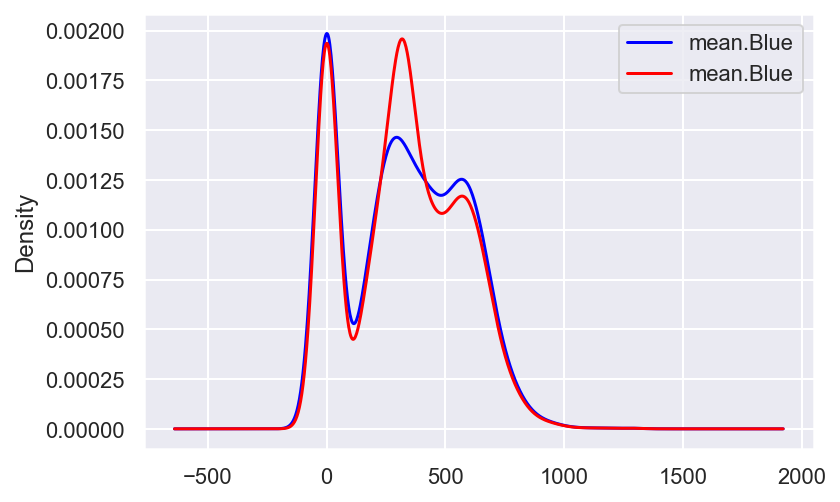

In [119]:
# The variable distribution changed slightly with
# more values accumulating towards the median 
# after the imputation.
fig = plt.figure()
ax = fig.add_subplot(111)
X3_train['mean.Blue'].plot(kind='kde', ax=ax,color='blue')
train_t['mean.Blue'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

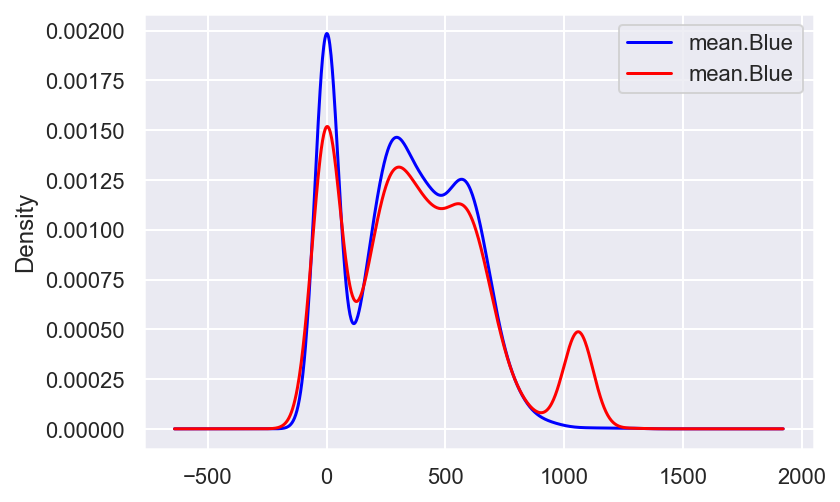

In [120]:
# The variable distribution changed slightly with
# more values accumulating towards the gaussian
# after the imputation.
fig = plt.figure()
ax = fig.add_subplot(111)
X4_train['mean.Blue'].plot(kind='kde', ax=ax,color='blue')
train_t4['mean.Blue'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
#pip install yellowbrick

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # data visualization library  
import os
import yellowbrick
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [123]:
train=df2.drop(['area'], axis=1)
test=  df2['area']     

In [124]:
# Separate into train and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(
   train,
    test,
    test_size=0.4,
    random_state=0
)
X3_train.shape, X3_test.shape


((2865, 25), (1910, 25))

<AxesSubplot:>

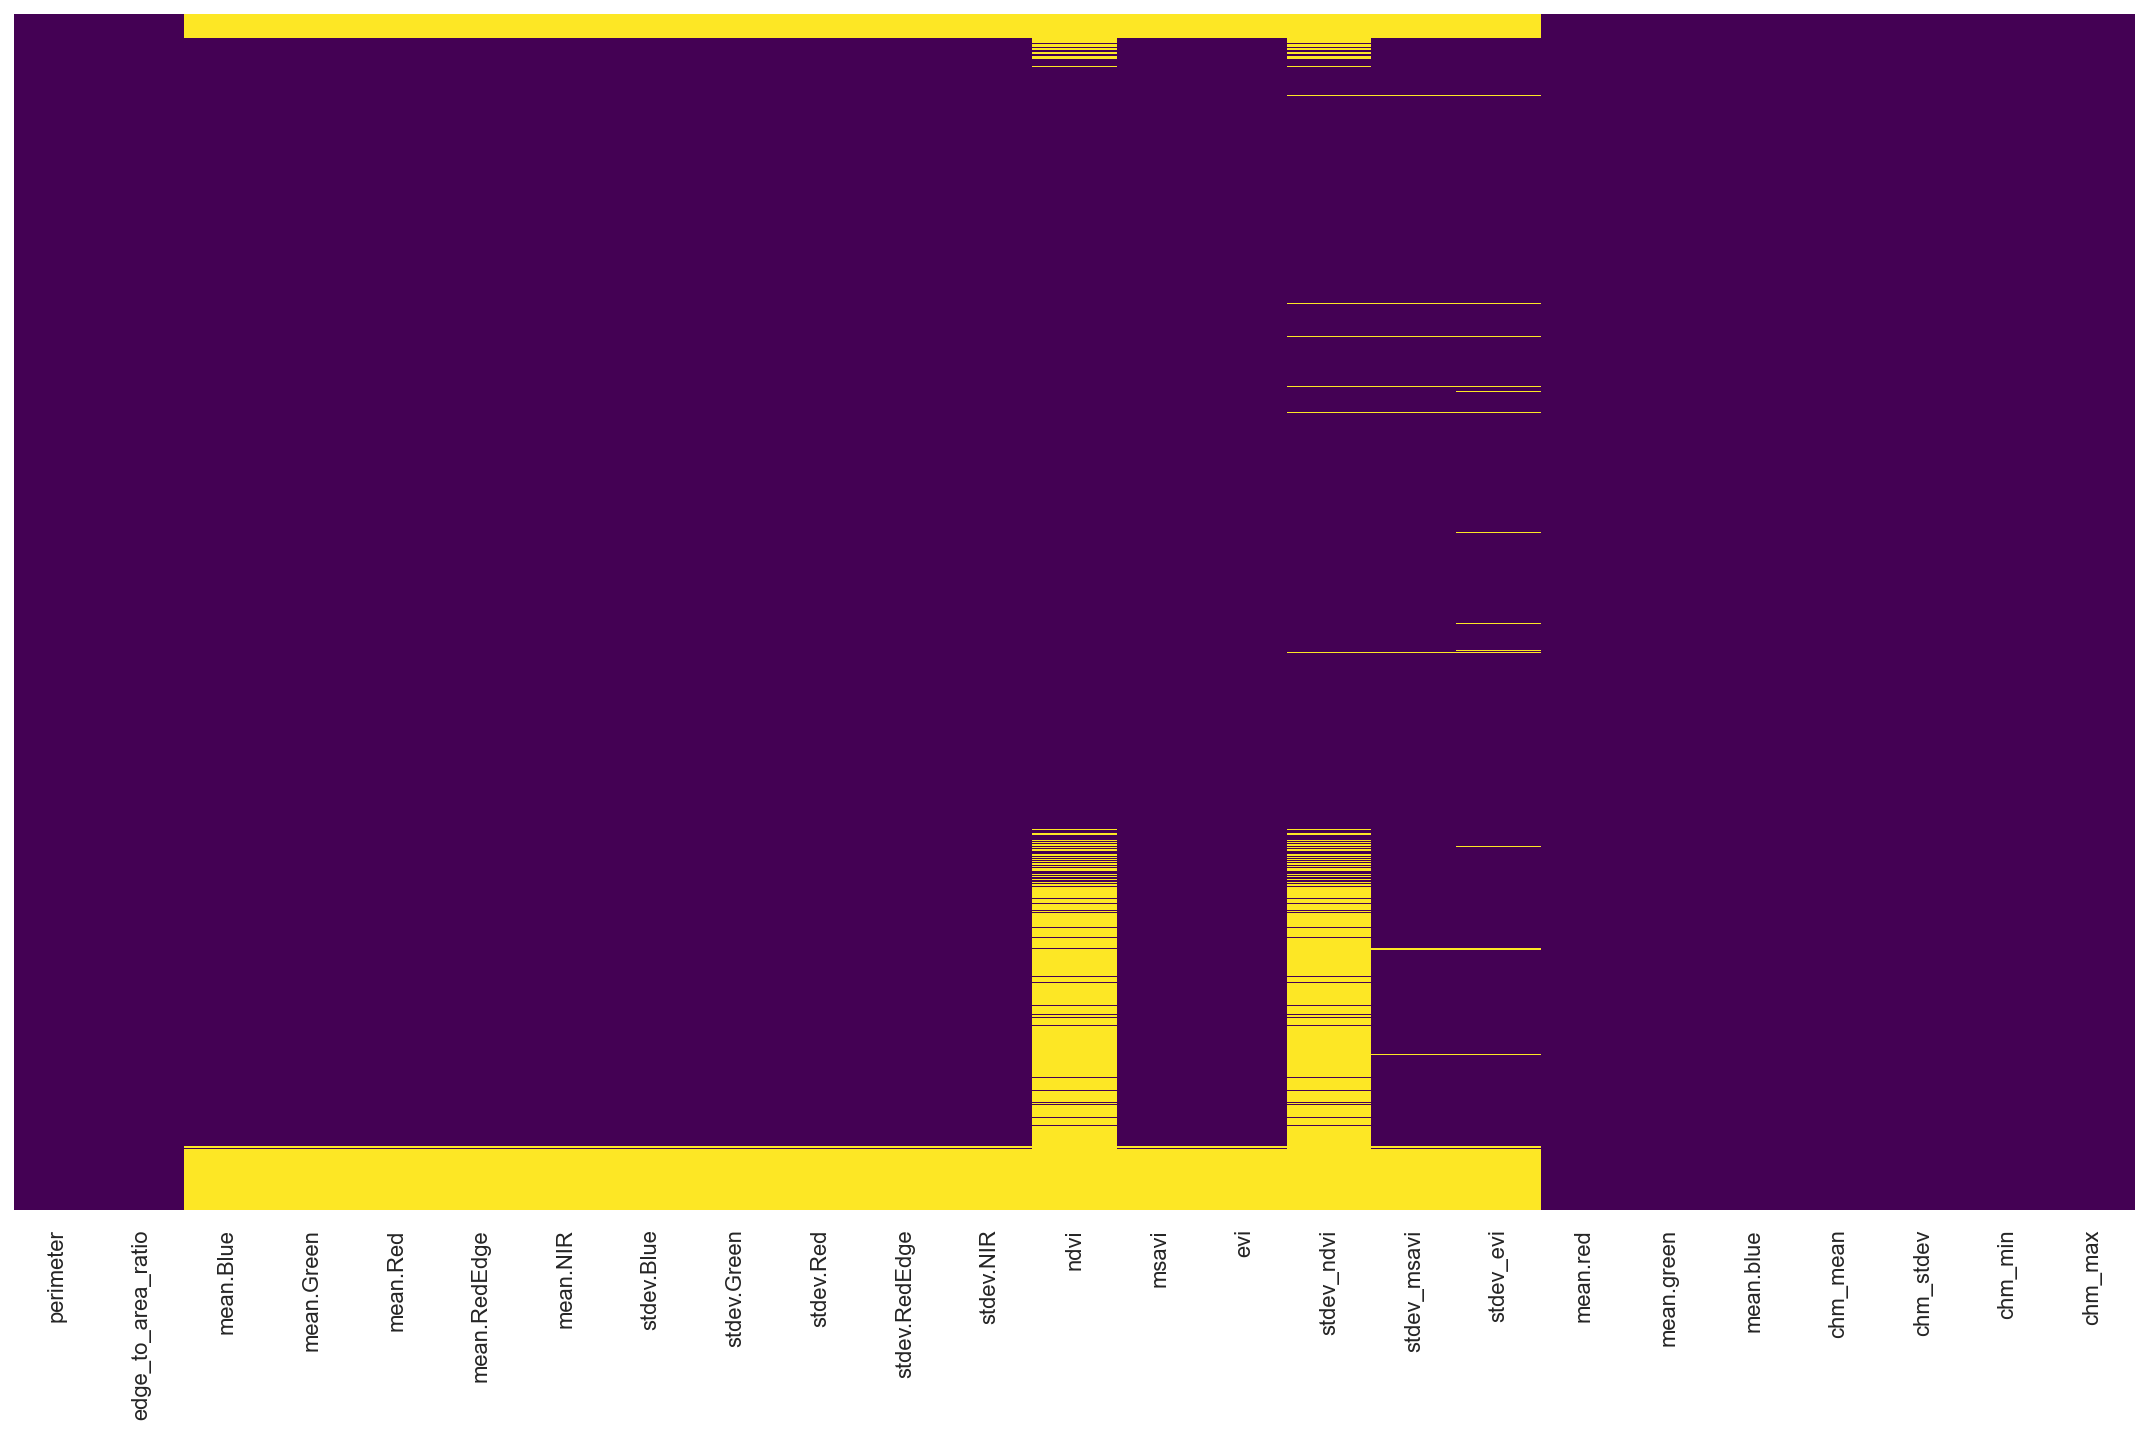

In [125]:
#getting the dimensions of the plot
fig, ax = plt.subplots(figsize=(19, 11))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

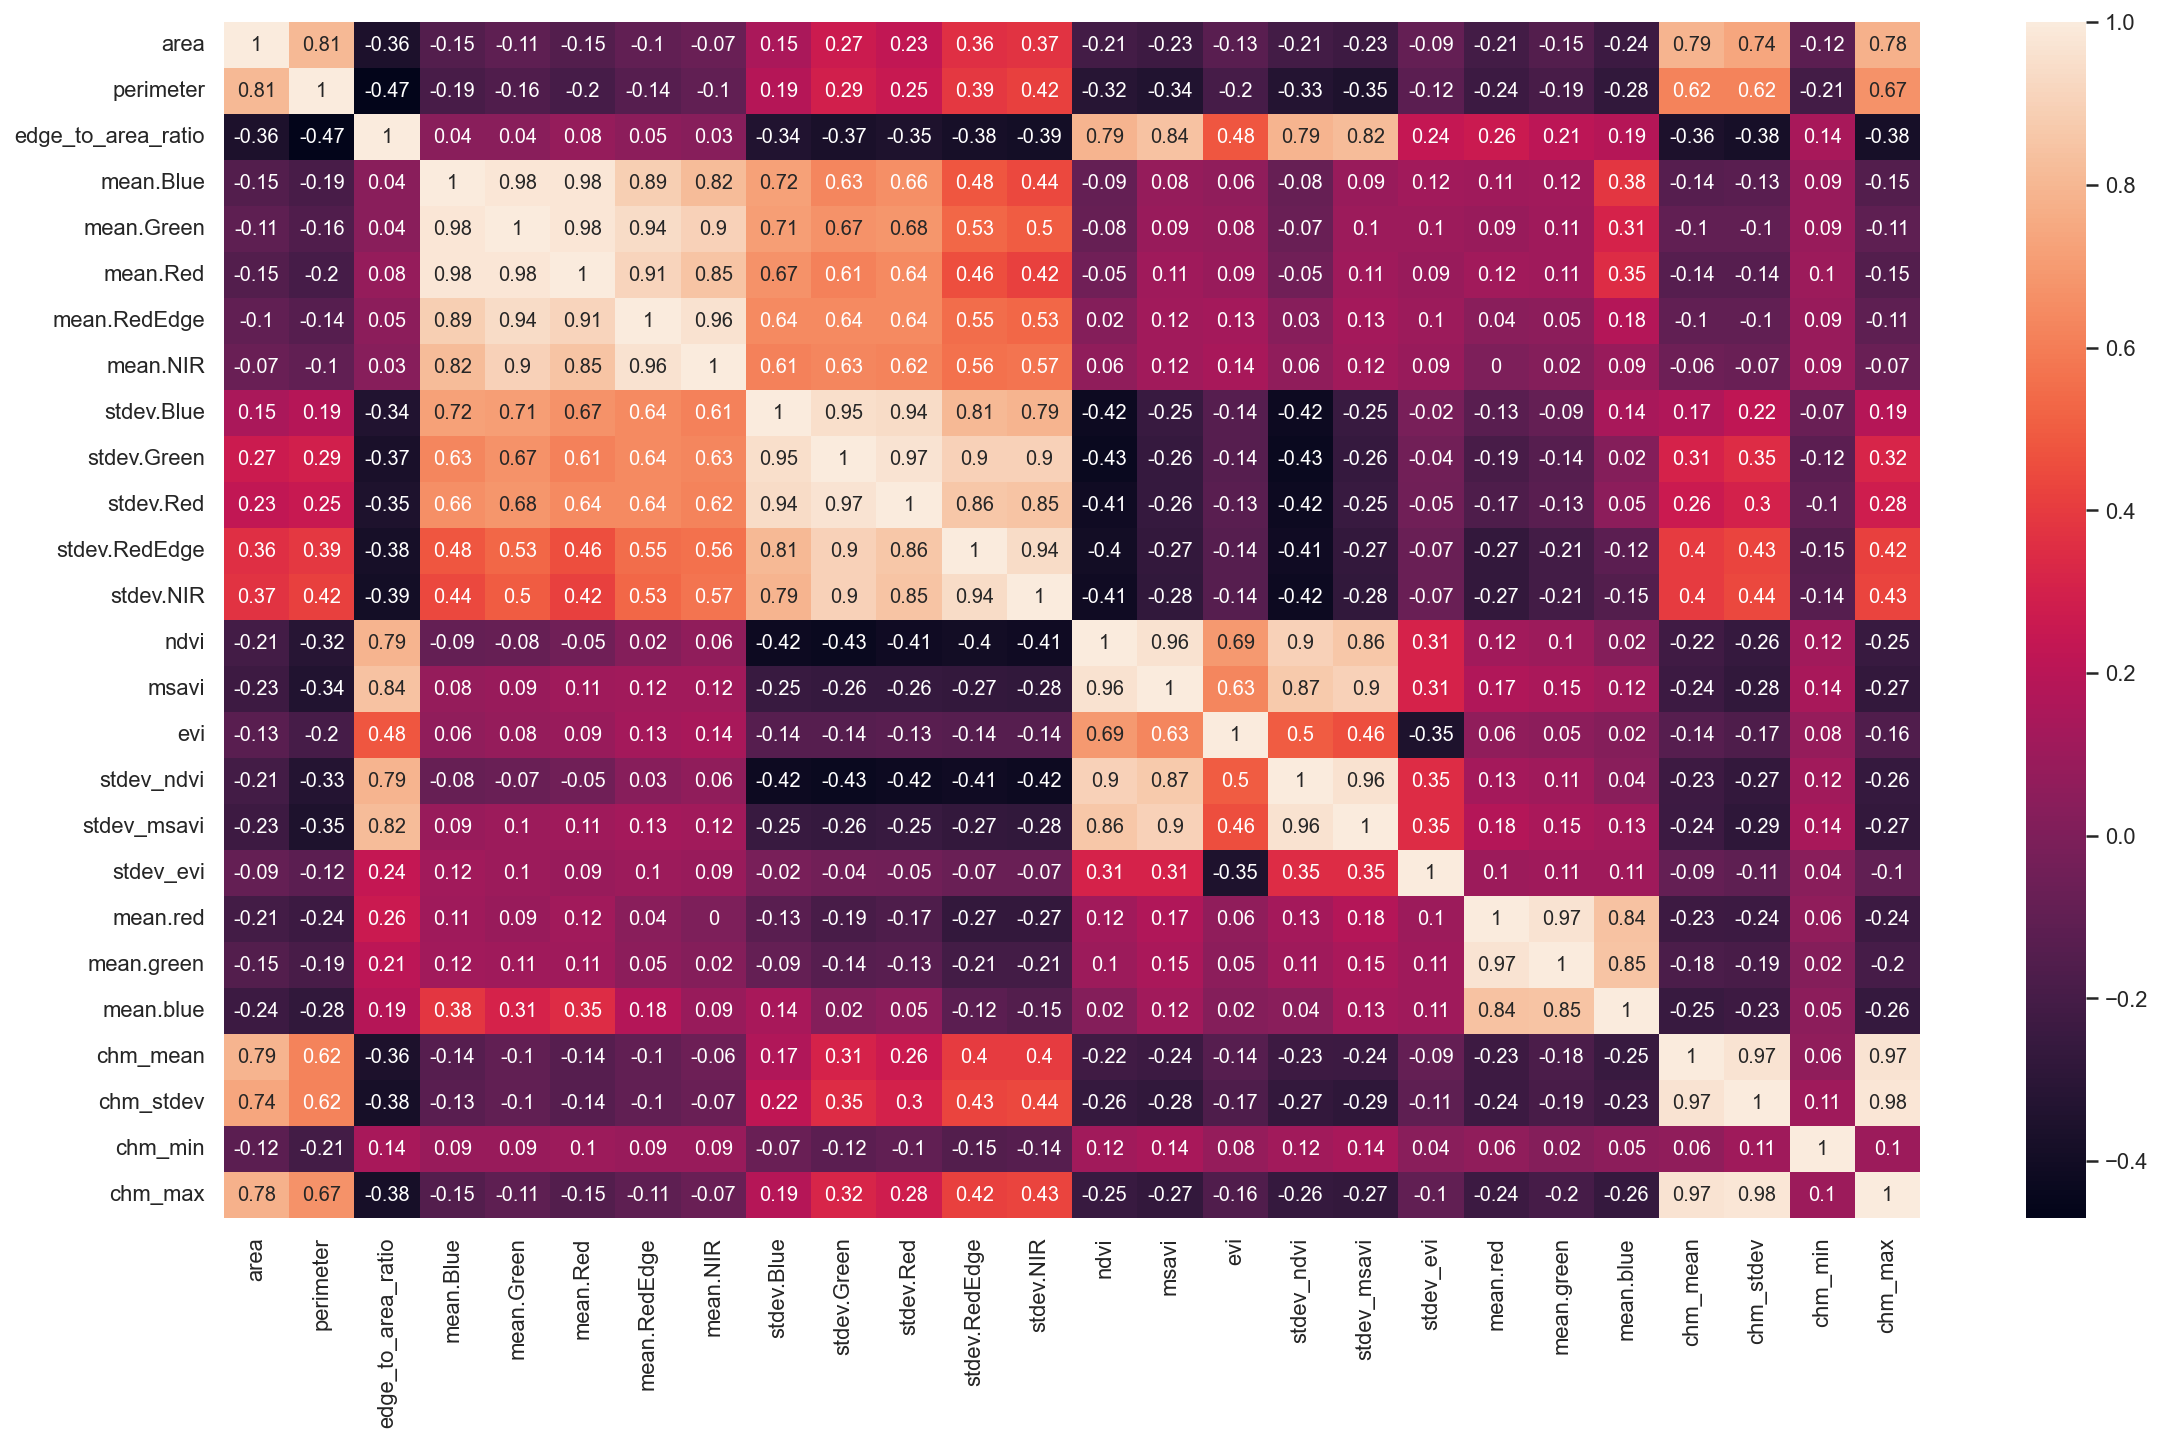

In [128]:
#Using Pearson Correlation
plt.figure(fig)
sns.heatmap(df2.corr().round(2), annot=True)

In [129]:
cor=df2.corr()

In [130]:
#Correlation with output variable
cor_target = abs(cor["mean.Blue"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

mean.Blue       1.000000
mean.Green      0.980528
mean.Red        0.982609
mean.RedEdge    0.889378
mean.NIR        0.821666
stdev.Blue      0.716009
stdev.Green     0.634994
stdev.Red       0.657067
Name: mean.Blue, dtype: float64

# Feature importance analysis 

In [87]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip install numpy==1.21.6

In [ ]:
#pip install numba==0.53

In [131]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
no_missing_median.head()

In [132]:
import pandas as pd
import numpy as np

def clean_dataset(no_missing_median):
    assert isinstance(no_missing_median, pd.DataFrame), "df needs to be a pd.DataFrame"
    no_missing_median.dropna(inplace=True)
    indices_to_keep = ~no_missing_median.isin([np.nan, np.inf, -np.inf]).any(1)
    return no_missing_median[indices_to_keep].astype(np.float64)

In [133]:
clean_df=clean_dataset(no_missing_median)

In [134]:
clean_df

,perimeter,edge_to_area_ratio,mean.Blue,mean.Green,mean.Red,mean.RedEdge,mean.NIR,stdev.Blue,stdev.Green,stdev.Red,...,stdev_ndvi,stdev_msavi,stdev_evi,mean.red,mean.green,mean.blue,chm_mean,chm_stdev,chm_min,chm_max
0,4.409133,15.257930,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,75.13522,...,0.001442,0.002833,0.003331,166.998215,160.704224,123.871429,0.195925,0.030815,0.150024,0.263916
1,3.541193,8.546887,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,75.13522,...,0.001442,0.002833,0.003331,160.587936,154.385712,117.412163,0.240878,0.055254,0.150269,0.357788
2,3.888369,8.489555,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,75.13522,...,0.001442,0.002833,0.003331,179.241623,171.927490,130.955276,0.248533,0.057536,0.149902,0.373047
3,2.916277,13.025697,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,75.13522,...,0.001442,0.002833,0.003331,181.233414,176.158005,138.069183,0.200809,0.030480,0.147827,0.277222
4,2.221925,26.334947,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,75.13522,...,0.001442,0.002833,0.003331,175.276062,172.257019,138.922546,0.181163,0.019786,0.150146,0.221436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,4.548003,4.091411,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,75.13522,...,0.001442,0.002833,0.003331,151.661636,136.138687,95.875359,1.754028,0.982317,0.549194,3.853271
4771,4.617439,4.051731,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,75.13522,...,0.001442,0.002833,0.003331,144.890945,129.678467,91.414825,1.633561,0.891511,0.574951,3.680176
4772,8.366938,3.529991,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,75.13522,...,0.001442,0.002833,0.003331,119.492584,110.748672,75.828621,1.439602,0.716141,0.568726,3.369507
4773,19.511282,9.042180,323.603012,548.745422,467.195129,1106.279785,1214.243408,58.24679,83.744099,75.13522,...,0.001442,0.002833,0.003331,167.375397,153.888779,106.953186,0.330553,0.122733,0.082275,0.688232


In [135]:
from sklearn.ensemble import RandomForestClassifier
X6=clean_df.drop(['perimeter'],axis=1)
y6=clean_df['perimeter']

model6 =XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.001)
# # Fit the Model
model6.fit(X6, y6)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [136]:
# load JS visualization code to notebook
shap.initjs()


In [137]:
explainer = shap.TreeExplainer(model6)
shap_values = explainer.shap_values(X6)

In [138]:
i =1
shap.force_plot(explainer.expected_value, shap_values[i], features=X6.iloc[i], feature_names=X6.columns)


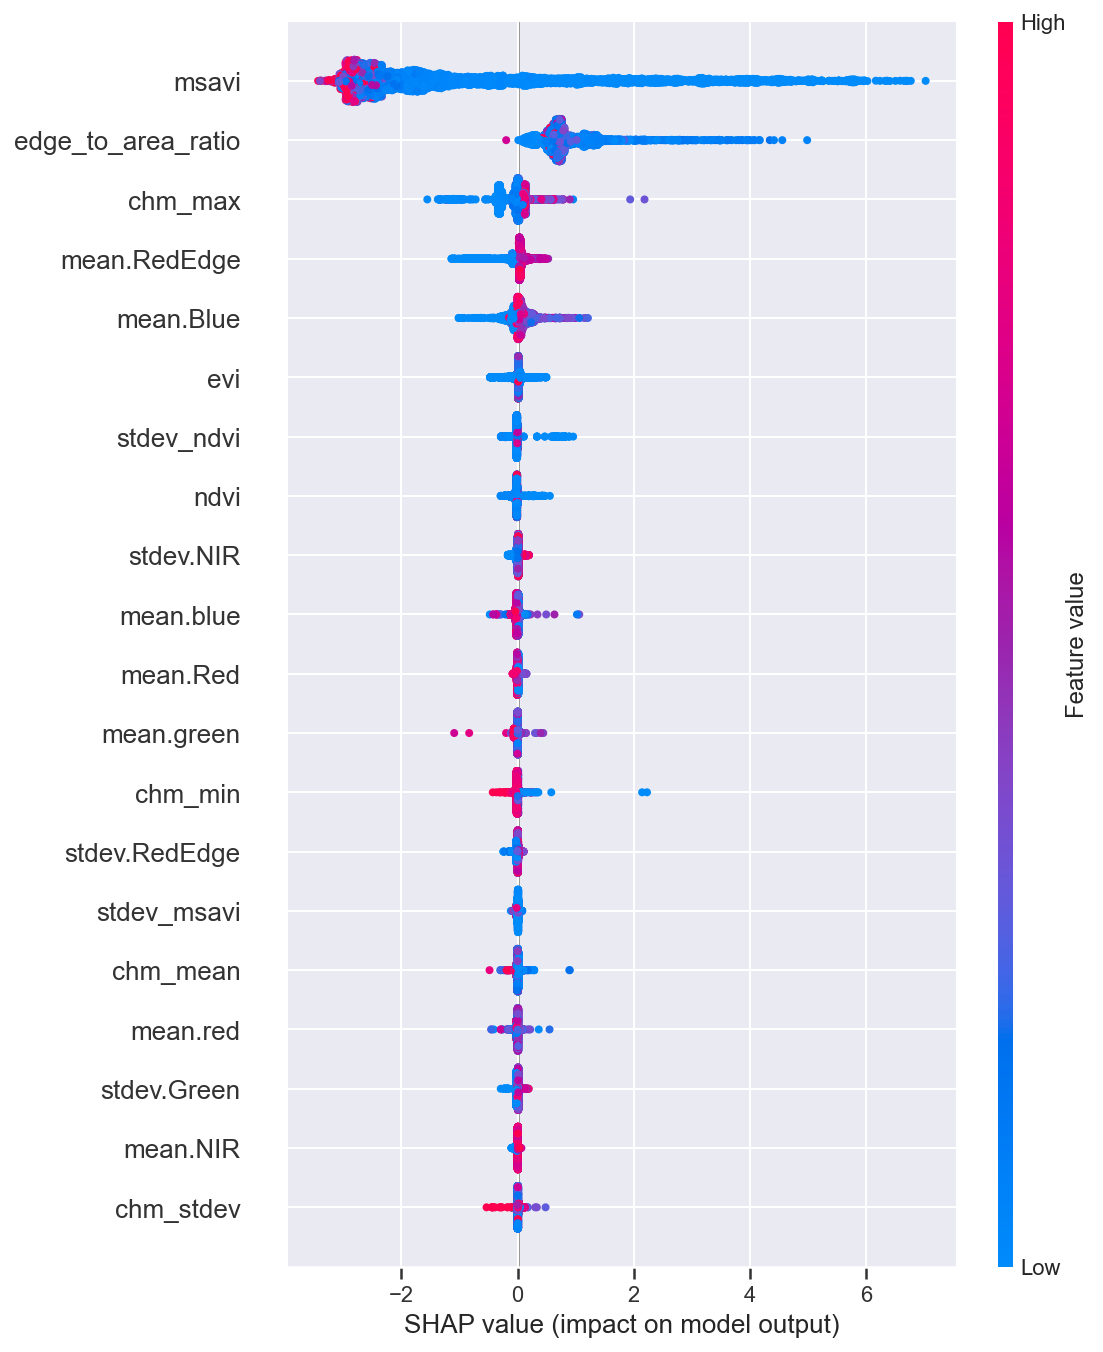

In [139]:
#Summary Plot
shap.summary_plot(shap_values, features=X6, feature_names=X6.columns)

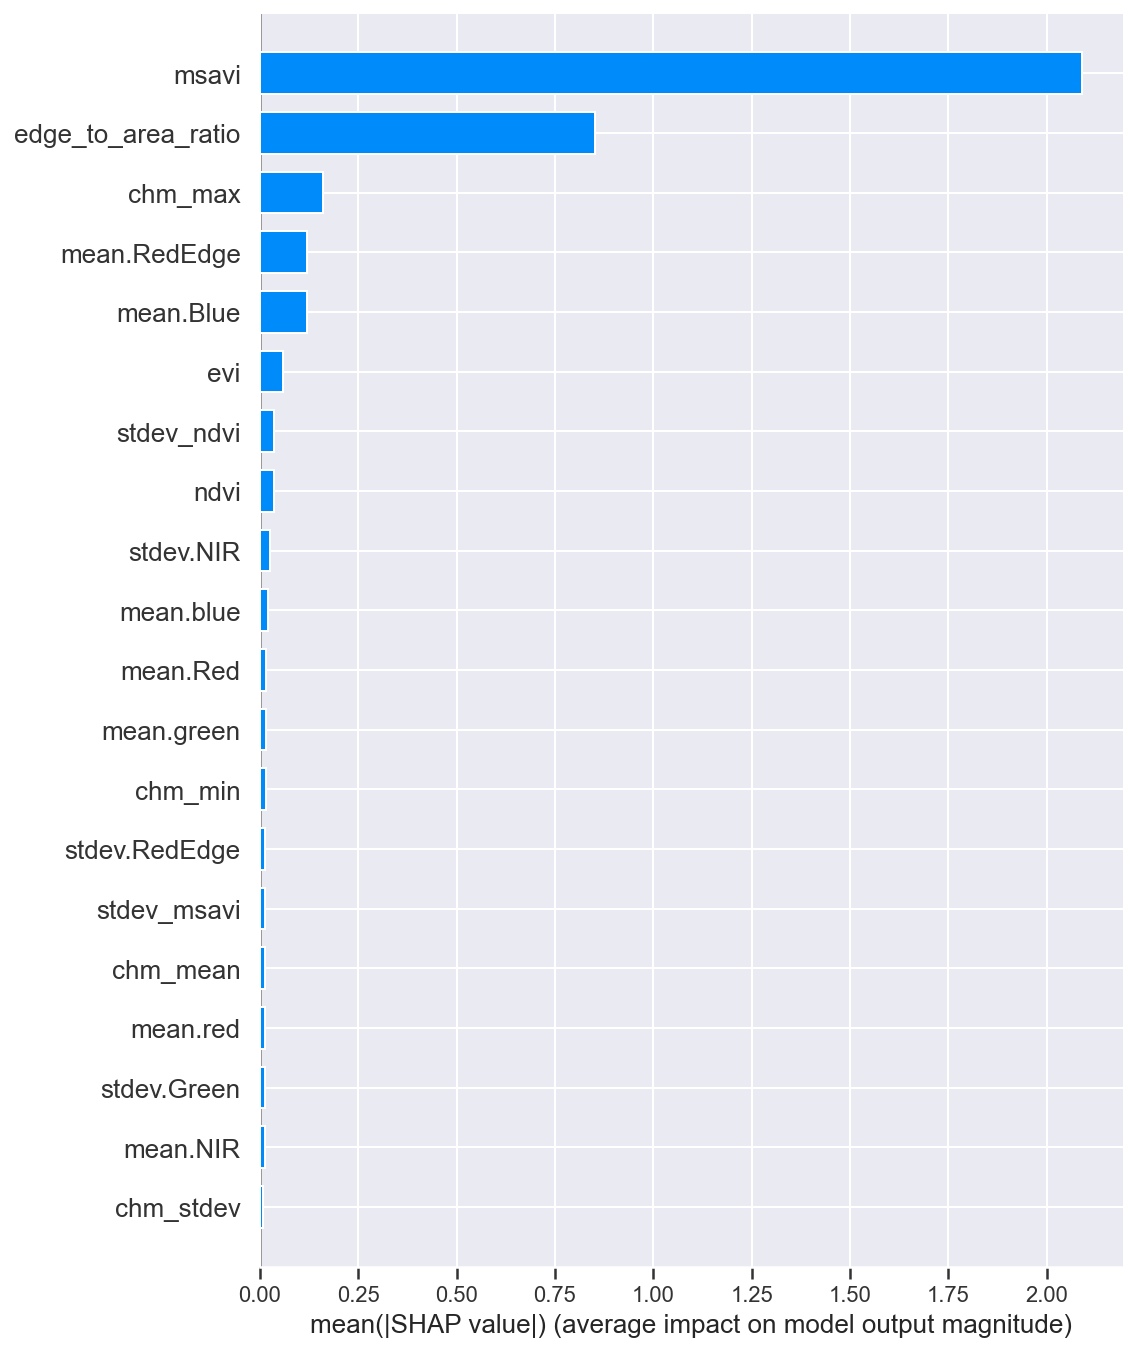

In [140]:
shap.summary_plot(shap_values, features=X6, feature_names=X6.columns, plot_type='bar')

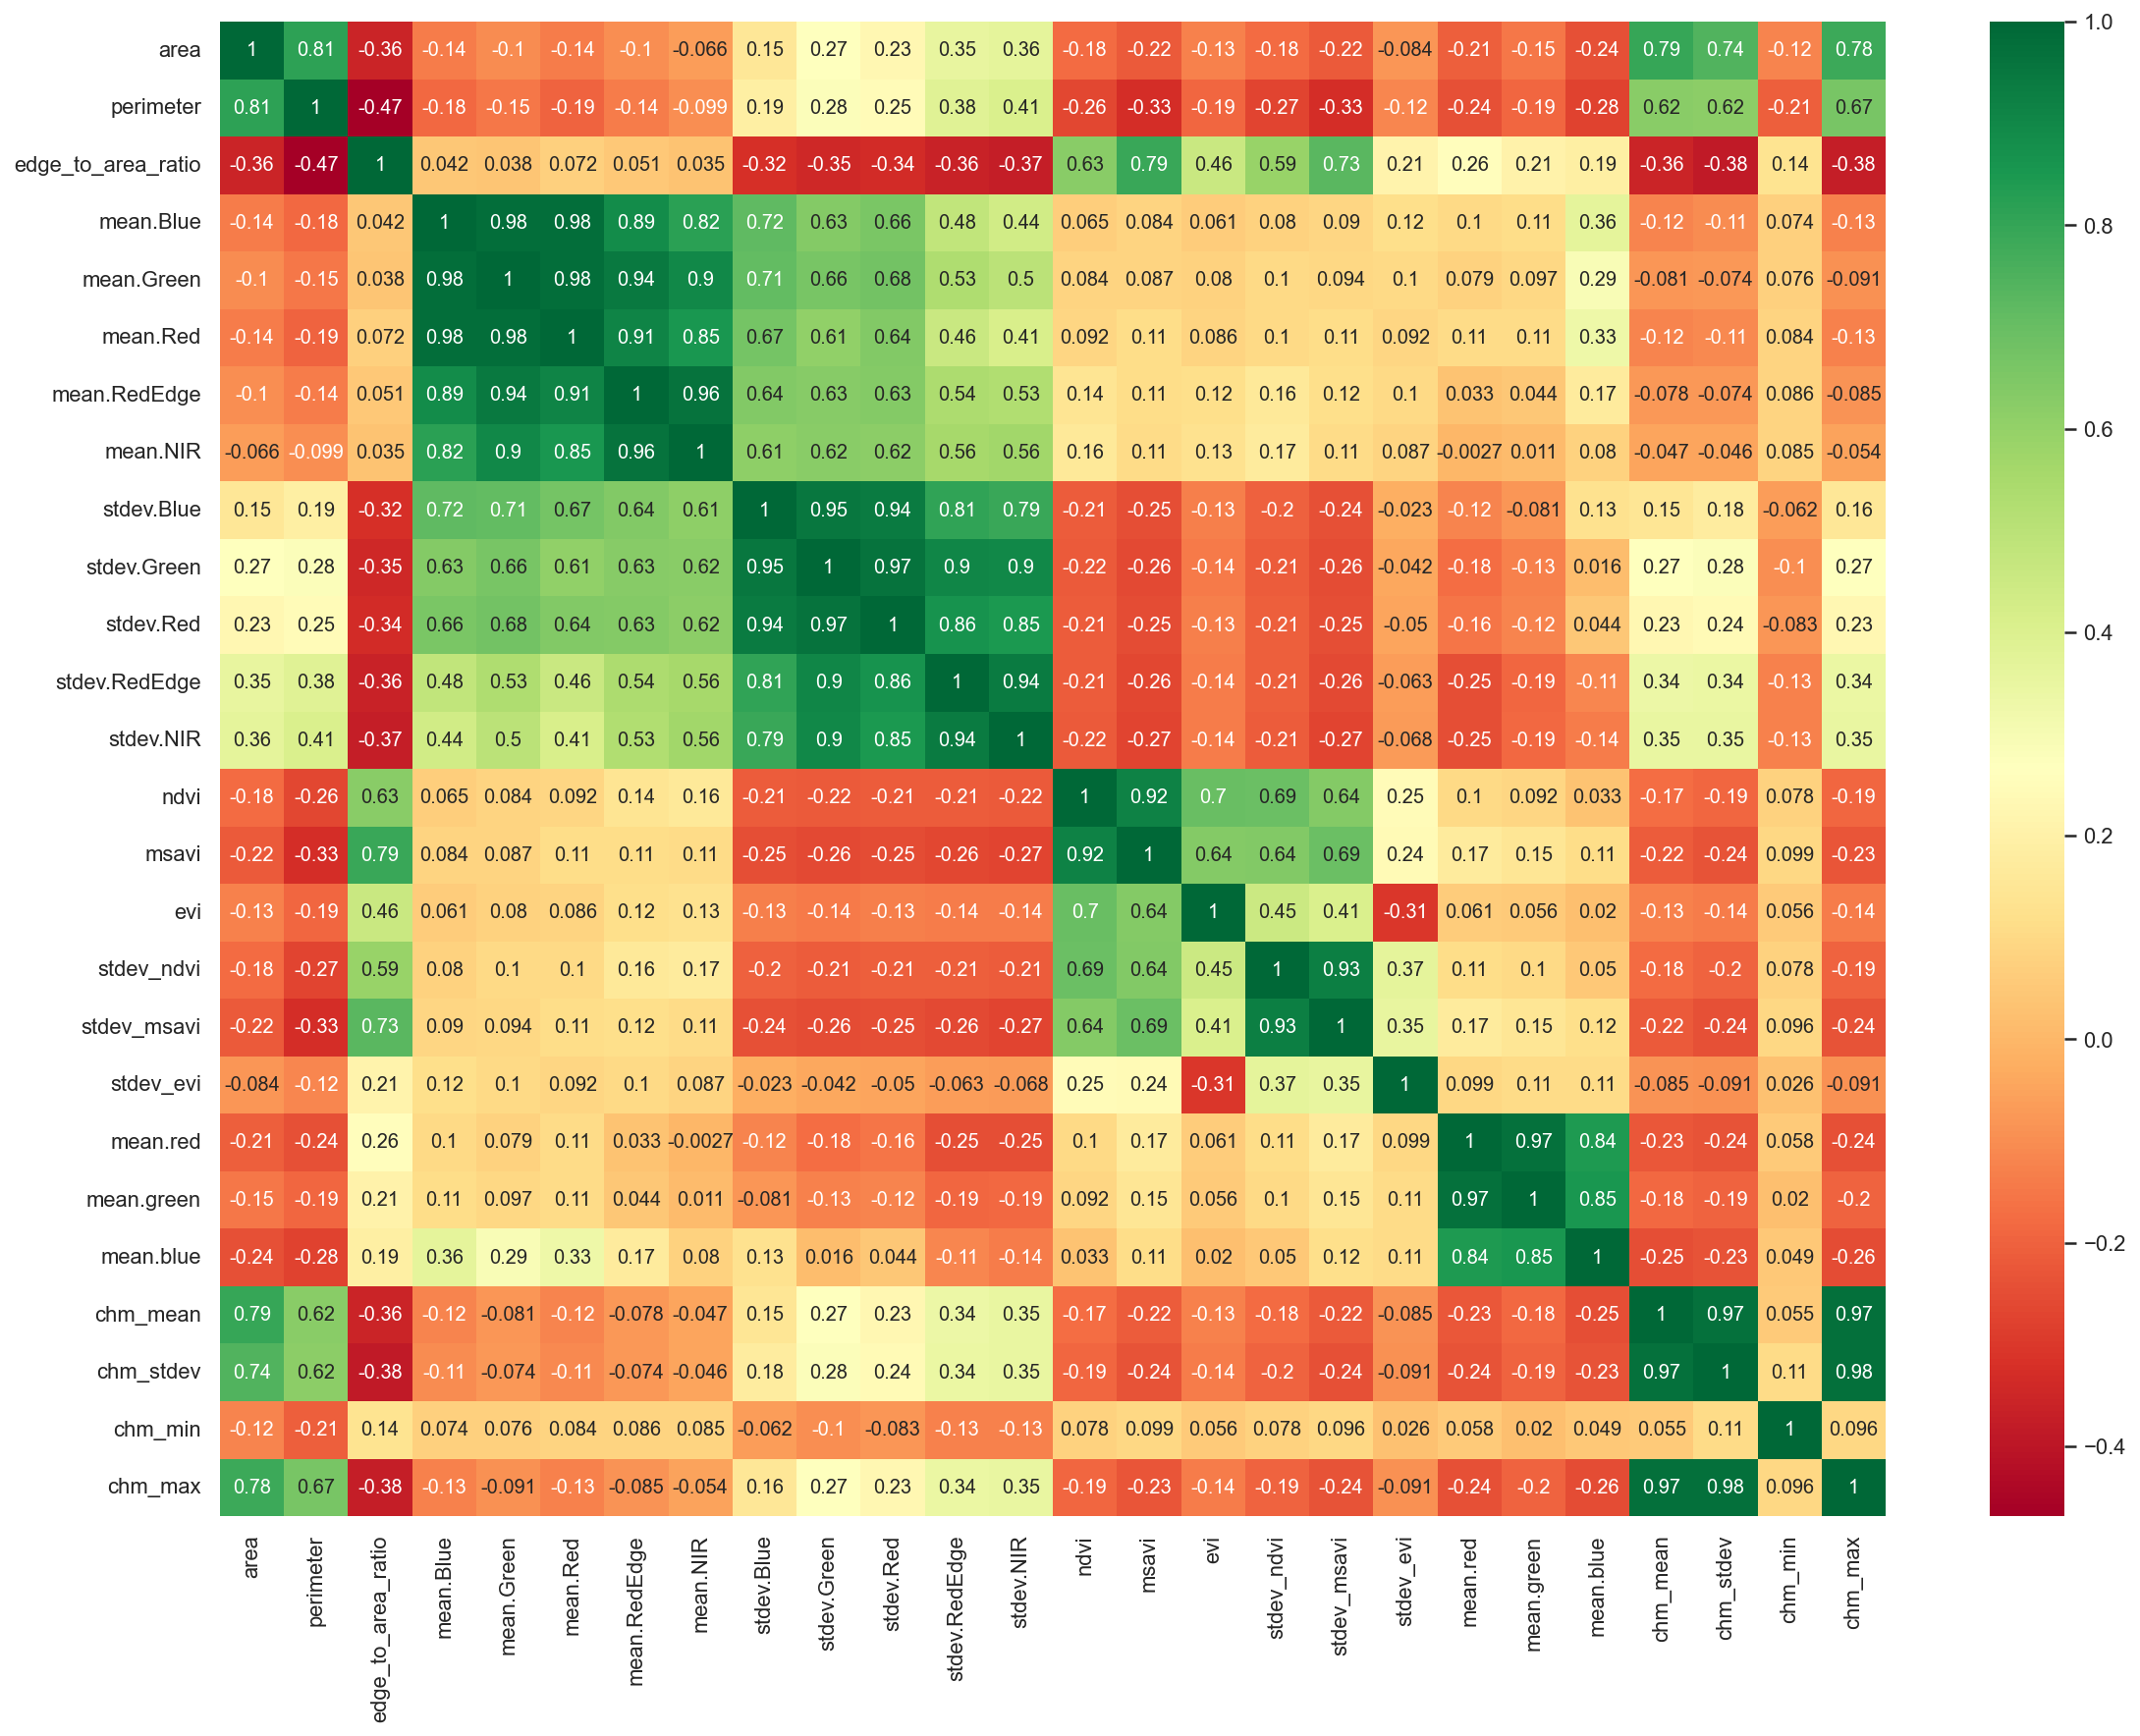

In [141]:
plt.figure(figsize=(19,14))
#plot heat map
g=sns.heatmap(pred_value_median.corr(),annot=True,cmap="RdYlGn")